In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [247]:
pd.set_option('display.max_columns', None)

In [248]:
df = pd.read_csv("../data/player_totals.csv")
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})

In [249]:
for k, v in df.items():
    print(k, v.dtype)

seas_id int64
season int64
player_id int64
player string
birth_year float64
pos string
age float64
experience int64
lg string
tm string
g int64
gs float64
mp float64
fg int64
fga int64
fg_percent float64
x3p float64
x3pa float64
x3p_percent float64
x2p int64
x2pa int64
x2p_percent float64
e_fg_percent float64
ft int64
fta int64
ft_percent float64
orb float64
drb float64
trb float64
ast int64
stl float64
blk float64
tov float64
pf int64
pts int64


In [250]:
print(df.sample(n=10, random_state=42))

       seas_id  season  player_id            player  birth_year    pos   age  \
9999     22496    2010       3132      Larry Hughes         NaN     SG  31.0   
8370     24371    2013       3634    Raymond Felton         NaN     PG  28.0   
2265     29972    2022       4725   Jalen McDaniels         NaN     SF  24.0   
19039    13412    1993       2666     Larry Johnson      1969.0     PF  23.0   
11401    21561    2008       3225  Wally Szczerbiak         NaN     SF  30.0   
12902    19724    2005       3276       Mike Miller         NaN     SF  24.0   
17125    15478    1997       2191      Michael Cage         NaN      C  35.0   
15405    16936    2000       2513         J.R. Reid         NaN     PF  31.0   
3662     28500    2020       4617        Gary Clark         NaN     PF  25.0   
18068    14305    1995       2177     Jay Humphries         NaN  SG-PG  32.0   

       experience   lg   tm   g    gs      mp   fg   fga  fg_percent    x3p  \
9999           12  NBA  TOT  45  16.0  1

In [251]:
print(len(df))

32392


### Mean 

```markdown
Average (Season)
age                26.367686
experience          4.597473
g                  49.530287
gs                 24.526553
mp               1206.888742
fg                193.657693
fga               439.024726
x3p                21.563792
x3pa               62.191800
x2p               179.131106
x2pa              397.396429
ft                106.075087
fta               142.581804
orb                67.757644
drb               154.040225
trb               237.206774
ast               111.327424
stl                40.245328
blk                32.275404
tov                76.046426
pf                117.548830
pts               507.917058
fg_percent          0.441109
e_fg_percent        0.465668
x2p_percent         0.450762
x3p_percent         0.346730
ft_percent          0.743960
```

```markdown
Weighted Average (Season)
age                26.477356
experience          4.978421
g                  48.348203
gs                 22.239065
mp               1151.493468
fg                186.531458
fga               412.293035
x3p                25.739439
x3pa               73.250154
x2p               165.839467
x2pa              353.407076
ft                 95.820079
fta               127.730736
orb                58.944619
drb               143.848314
trb               215.220935
ast               108.780964
stl                37.530412
blk                23.124706
tov                70.113653
pf                108.905131
pts               489.574988
fg_percent          0.452424
e_fg_percent        0.483639
x2p_percent         0.469259
x3p_percent         0.351391
ft_percent          0.750172
```

```markdown
Average (Career)
age              27.169443
experience        5.000382
g               298.873092
gs              100.818511
mp             6880.173473
fg             1153.077672
fga            2548.663359
x3p             127.911260
x3pa            364.014122
x2p            1025.166412
x2pa           2184.649237
ft              592.329008
fta             789.590458
orb             311.990267
drb             761.380344
trb            1293.707824
ast             672.449046
stl             191.705916
blk             118.125763
tov             358.021183
pf              673.216603
pts            3026.395611
```

### Age vs Peformance

In [335]:
import pandas as pd
import altair as alt
from IPython.display import display, Markdown

In [336]:
df = pd.read_csv("../data/player_totals.csv")
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})
df = df[df['lg'] == 'NBA']
df = df[df['season'] >= 1955]
df = df[df['g'] >= 48.34820326006421]

df['age'] = df['age'].astype('int64')

In [337]:
df['PPG'] = df['pts'] / df['g']
df['APG'] = df['ast'] / df['g']
df['SPG'] = df['stl'] / df['g']
df['BPG'] = df['blk'] / df['g']
df['RPG'] = df['trb'] / df['g']

In [338]:
lebron_age_stats = df[df['player'] == 'LeBron James'].copy()
lebron_age_stats.rename(columns={'player': 'Name', 'age': 'Age'}, inplace=True)
lebron_age_stats.sort_values(by='Age', inplace=True)

In [339]:
mj_age_stats = df[df['player'] == 'Michael Jordan'].copy()
mj_age_stats.rename(columns={'player': 'Name', 'age': 'Age'}, inplace=True)
mj_age_stats.sort_values(by='Age', inplace=True)

In [340]:
kobe_age_stats = df[df['player'] == 'Kobe Bryant'].copy()
kobe_age_stats.rename(columns={'player': 'Name', 'age': 'Age'}, inplace=True)
kobe_age_stats.sort_values(by='Age', inplace=True)

In [341]:
grouped = df.groupby('age')
age_stats = grouped[['pts', 'ast', 'stl', 'blk', 'trb']].sum()
games_played = grouped['g'].sum()
age_stats = age_stats.div(games_played, axis=0)
age_stats = age_stats.rename(
    columns={'pts': 'PPG', 'ast': 'APG', 'stl': 'SPG', 'blk': 'BPG', 'trb': 'RPG'}
).reset_index()

In [342]:
age_stats.rename(columns={'age': 'Age'}, inplace=True)
df.rename(columns={'player': 'Name', 'age': 'Age'}, inplace=True)

In [343]:
max_avg_ages = {metric: age_stats.loc[age_stats[metric].idxmax(), 'Age'] for metric in ['PPG', 'APG', 'SPG', 'BPG', 'RPG']}
min_avg_ages = {metric: age_stats.loc[age_stats[metric].idxmin(), 'Age'] for metric in ['PPG', 'APG', 'SPG', 'BPG', 'RPG']}

In [344]:
metrics = ['PPG', 'APG', 'RPG', 'SPG', 'BPG']
titles = [
    'Points Per Game (PPG)', 
    'Assists Per Game (APG)', 
    'Rebounds Per Game (RPG)',
    'Steals Per Game (SPG)', 
    'Blocks Per Game (BPG)', 
]

In [345]:
display(Markdown(f"## Age vs Peformance"))
display(Markdown("---"))

for metric, title in zip(metrics, titles):
    # Top-Performer
    max_metric_stats = df.groupby('Age').apply(
        lambda x: x.loc[x[metric].idxmax()]
    ).reset_index(drop=True)
    
    max_player_points = alt.Chart(max_metric_stats).mark_circle().encode(
        x=alt.X('Age:Q', title='Age'),
        y=alt.Y(f'{metric}:Q'),
        size=alt.Size(f'{metric}:Q'),
        color=alt.Color(f'{metric}:Q'),
        tooltip=['Age', 'Name', metric]
    ).interactive()

    # League Average
    average_line = alt.Chart(age_stats).mark_line().encode(
        x=alt.X('Age:Q', title='Age'),
        y=alt.Y(f'{metric}:Q', title=f'{metric.upper()}'),
        tooltip=['Age', metric]
    ).properties(
        title=f'Age vs {title}',
        width='container',
        height=500
    )
    
    # LeBron James
    lebron_line = alt.Chart(lebron_age_stats).mark_line(color='yellow').encode(
        x=alt.X('Age:Q', title='Age'),
        y=alt.Y(f'{metric}:Q', title=f'{metric.upper()}'),
        tooltip=['Age', 'Name', f'{metric}']
    ).properties(
        title=f'LeBron James: Age vs {title}'
    )
    
    # Michael Jordan
    mj_line = alt.Chart(mj_age_stats).mark_line(color='red').encode(
        x=alt.X('Age:Q', title='Age'),
        y=alt.Y(f'{metric}:Q', title=f'{metric.upper()}'),
        tooltip=['Age', 'Name', f'{metric}']
    ).properties(
        title=f'Michael Jordan: Age vs {title}'
    )
    
    # Kobe Bryant
    kobe_line = alt.Chart(kobe_age_stats).mark_line(color='orange').encode(
        x=alt.X('Age:Q', title='Age'),
        y=alt.Y(f'{metric}:Q', title=f'{metric.upper()}'),
        tooltip=['Age', 'Name', f'{metric}']
    ).properties(
        title=f'Kobe Bryant: Age vs {title}'
    )
    
    # Maximum League Average
    max_avg_point = alt.Chart(age_stats[age_stats['Age'] == max_avg_ages[metric]]).mark_point(
        size=100, color='mediumseagreen', opacity=0.7
    ).encode(
        x='Age:Q',
        y=f'{metric}:Q',
        tooltip=['Age', metric]
    )
    
    # Minimum League Average
    min_avg_point = alt.Chart(age_stats[age_stats['Age'] == min_avg_ages[metric]]).mark_point(
        size=100, color='darkred', opacity=0.7
    ).encode(
        x='Age:Q',
        y=f'{metric}:Q',
        tooltip=['Age', metric]
    )

    final_chart = (average_line + lebron_line + mj_line + kobe_line +
                   max_avg_point + min_avg_point + max_player_points).interactive()
    final_chart.display()

    display(Markdown(f"### Average 🔵"))
    age_stats_metric = age_stats[['Age', metric]]
    display(age_stats_metric.style.hide(axis='index'))
    display(Markdown("### Michael Jordan 🔴"))
    mj_age_stats_metric = mj_age_stats[['Age', metric]]
    display(mj_age_stats_metric.style.hide(axis='index'))
    display(Markdown("### Kobe Bryant 🟠"))
    kobe_age_stats_metric = kobe_age_stats[['Age', metric]]
    display(kobe_age_stats_metric.style.hide(axis='index'))
    display(Markdown("### LeBron James 🟡"))
    lebron_age_stats_metric = lebron_age_stats[['Age', metric]]
    display(lebron_age_stats_metric.style.hide(axis='index'))
    display(Markdown("### Top-Performer"))
    max_metric_stats_metric = max_metric_stats[['Age', 'Name', metric]]
    display(max_metric_stats_metric.style.hide(axis='index'))
    display(Markdown("---"))

## Age vs Peformance

---

alt.LayerChart(...)

### Average 🔵

Age,PPG
18,6.507614
19,9.568057
20,10.401862
21,11.060263
22,10.089928
23,10.503324
24,11.091355
25,11.517130
26,11.788277
27,11.922619


### Michael Jordan 🔴

Age,PPG
21,28.207317
23,37.085366
24,34.975610
25,32.506173
26,33.573171
27,31.463415
28,30.050000
29,32.576923
32,30.378049
33,29.646341


### Kobe Bryant 🟠

Age,PPG
18,7.591549
19,15.443038
20,19.920000
21,22.500000
22,28.500000
23,25.237500
24,30.012195
25,23.953846
26,27.560606
27,35.400000


### LeBron James 🟡

Age,PPG
19,20.936709
20,27.187500
21,31.367089
22,27.333333
23,30.000000
24,28.444444
25,29.710526
26,26.721519
27,27.145161
28,26.789474


### Top-Performer

Age,Name,PPG
18,Kobe Bryant,7.591549
19,Luka Dončić,21.194444
20,Luka Dončić,28.836066
21,LeBron James,31.367089
22,Rick Barry,35.576923
23,Wilt Chamberlain,37.597222
24,Wilt Chamberlain,38.392405
25,Wilt Chamberlain,50.362500
26,Wilt Chamberlain,44.825000
27,Wilt Chamberlain,36.850000


---

alt.LayerChart(...)

### Average 🔵

Age,APG
18,1.116751
19,1.838401
20,2.177970
21,2.173907
22,2.115470
23,2.219409
24,2.359645
25,2.500013
26,2.592004
27,2.672417


### Michael Jordan 🔴

Age,APG
21,5.865854
23,4.597561
24,5.914634
25,8.024691
26,6.329268
27,5.524390
28,6.112500
29,5.487179
32,4.292683
33,4.292683


### Kobe Bryant 🟠

Age,APG
18,1.281690
19,2.518987
20,3.800000
21,4.893939
22,4.970588
23,5.475000
24,5.865854
25,5.076923
26,6.030303
27,4.500000


### LeBron James 🟡

Age,APG
19,5.886076
20,7.212500
21,6.594937
22,6.025641
23,7.186667
24,7.246914
25,8.565789
26,7.012658
27,6.241935
28,7.250000


### Top-Performer

Age,Name,APG
18,Tracy McGrady,1.531250
19,Stephon Marbury,7.791045
20,Luka Dončić,8.819672
21,Trae Young,9.333333
22,Kevin Johnson,12.234568
23,Isiah Thomas,13.864198
24,Magic Johnson,13.059701
25,John Stockton,13.756098
26,John Stockton,13.634146
27,John Stockton,14.538462


---

alt.LayerChart(...)

### Average 🔵

Age,RPG
18,3.497462
19,4.227194
20,4.532661
21,4.704081
22,4.472780
23,4.555833
24,4.703960
25,4.877403
26,4.961228
27,4.938018


### Michael Jordan 🔴

Age,RPG
21,6.512195
23,5.243902
24,5.475610
25,8.049383
26,6.890244
27,6.000000
28,6.387500
29,6.692308
32,6.621951
33,5.878049


### Kobe Bryant 🟠

Age,RPG
18,1.859155
19,3.063291
20,5.280000
21,6.303030
22,5.867647
23,5.512500
24,6.878049
25,5.523077
26,5.939394
27,5.312500


### LeBron James 🟡

Age,RPG
19,5.468354
20,7.350000
21,7.037975
22,6.743590
23,7.893333
24,7.567901
25,7.289474
26,7.468354
27,7.935484
28,8.026316


### Top-Performer

Age,Name,RPG
18,Bill Willoughby,4.645161
19,Dwight Howard,10.036585
20,Shaquille O'Neal,13.851852
21,Andre Drummond,13.463415
22,Walt Bellamy,18.987342
23,Wilt Chamberlain,26.958333
24,Wilt Chamberlain,27.202532
25,Wilt Chamberlain,25.650000
26,Wilt Chamberlain,24.325000
27,Bill Russell,23.552632


---

alt.LayerChart(...)

### Average 🔵

Age,SPG
18,0.685279
19,0.685056
20,0.784845
21,0.789478
22,0.678562
23,0.714308
24,0.737772
25,0.765079
26,0.767280
27,0.767070


### Michael Jordan 🔴

Age,SPG
21,2.390244
23,2.878049
24,3.158537
25,2.888889
26,2.768293
27,2.719512
28,2.275000
29,2.833333
32,2.195122
33,1.707317


### Kobe Bryant 🟠

Age,SPG
18,0.690141
19,0.936709
20,1.440000
21,1.606061
22,1.676471
23,1.475000
24,2.207317
25,1.723077
26,1.303030
27,1.837500


### LeBron James 🟡

Age,SPG
19,1.645570
20,2.212500
21,1.556962
22,1.602564
23,1.840000
24,1.691358
25,1.644737
26,1.569620
27,1.854839
28,1.697368


### Top-Performer

Age,Name,SPG
18,Tracy McGrady,0.765625
19,LeBron James,1.645570
20,Magic Johnson,2.428571
21,Isiah Thomas,2.456790
22,Chris Paul,2.712500
23,Alvin Robertson,3.670732
24,Micheal Ray Richardson,3.231707
25,Alvin Robertson,2.963415
26,Don Buse,3.469136
27,Gary Payton,2.851852


---

alt.LayerChart(...)

### Average 🔵

Age,BPG
18,0.573604
19,0.614104
20,0.596266
21,0.583298
22,0.433439
23,0.443599
24,0.455459
25,0.461336
26,0.464251
27,0.463049


### Michael Jordan 🔴

Age,BPG
21,0.841463
23,1.524390
24,1.597561
25,0.802469
26,0.658537
27,1.012195
28,0.937500
29,0.782051
32,0.512195
33,0.536585


### Kobe Bryant 🟠

Age,BPG
18,0.323944
19,0.506329
20,1.000000
21,0.939394
22,0.632353
23,0.437500
24,0.817073
25,0.430769
26,0.803030
27,0.375000


### LeBron James 🟡

Age,BPG
19,0.734177
20,0.650000
21,0.835443
22,0.705128
23,1.080000
24,1.148148
25,1.013158
26,0.632911
27,0.806452
28,0.881579


### Top-Performer

Age,Name,BPG
18,Tracy McGrady,0.953125
19,Josh Smith,1.945946
20,Victor Wembanyama,3.577465
21,Shawn Bradley,3.000000
22,Serge Ibaka,3.651515
23,Manute Bol,4.962500
24,Elmore Smith,4.851852
25,David Robinson,3.902439
26,David Robinson,4.485294
27,Hakeem Olajuwon,4.585366


---

### Position vs Performance

In [291]:
import pandas as pd
import altair as alt
from IPython.display import display, Markdown

In [292]:
df = pd.read_csv("../data/player_totals.csv")
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})
df = df[df['lg'] == 'NBA']
df = df[df['season'] >= 1955]

In [293]:
columns = [
        'birth_year', 'lg', 'tm', 'fg_percent', 'x3p_percent', 
        'x2p_percent', 'e_fg_percent', 'ft_percent', 'player_id'
    ]
df = df.drop(columns=columns)

agg_rules = {
    'seas_id': 'max',
    'season': 'max',
    'age': 'max',
    'experience': 'max',
    'pos': lambda x: x.mode()[0] if not x.mode().empty else None,
    'g': 'sum', 'gs': 'sum', 'mp': 'sum', 'fg': 'sum', 'fga': 'sum',
    'x3p': 'sum', 'x3pa': 'sum', 'x2p': 'sum', 'x2pa': 'sum',
    'ft': 'sum', 'fta': 'sum', 'orb': 'sum', 'drb': 'sum', 'trb': 'sum',
    'ast': 'sum', 'stl': 'sum', 'blk': 'sum', 'tov': 'sum', 'pf': 'sum', 'pts': 'sum'
}
df = df.groupby(['player'], as_index=False).agg(agg_rules)

df['fg_percent'] = (df['fg'] / df['fga']).fillna(0).round(3)
df['x3p_percent'] = (df['x3p'] / df['x3pa']).fillna(0).round(3)
df['x2p_percent'] = (df['x2p'] / df['x2pa']).fillna(0).round(3)
df['e_fg_percent'] = ((df['fg'] + 0.5 * df['x3p']) / df['fga']).fillna(0).round(3)
df['ft_percent'] = (df['ft'] / df['fta']).fillna(0).round(3)

In [294]:
df = df[df['g'] >= 312.79118942731276]

In [295]:
df = df[df['pos'].isin(['PG', 'SG', 'SF', 'PF', 'C'])]
numeric_cols = ['pts', 'ast', 'stl', 'blk', 'trb', 'g']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [296]:
df['PPG'] = df['pts'] / df['g']
df['APG'] = df['ast'] / df['g']
df['SPG'] = df['stl'] / df['g']
df['BPG'] = df['blk'] / df['g']
df['RPG'] = df['trb'] / df['g']

In [297]:
df['main_pos'] = df['pos']

grouped = df.groupby('main_pos')
position_stats = grouped[['pts', 'ast', 'stl', 'blk', 'trb']].sum()
games_played = grouped['g'].sum()
position_stats = position_stats.div(games_played, axis=0)
position_stats = position_stats.rename(
    columns={'pts': 'PPG', 
            'ast': 'APG', 
            'stl': 'SPG', 
            'blk': 'BPG', 
            'trb': 'RPG'}
).reset_index()

In [298]:
position_stats.rename(columns={'main_pos': 'Position'}, inplace=True)
df.rename(columns={'player': 'Name', 
                'pts': 'PTS', 
                'ast': 'AST', 
                'trb': 'REB',
                'stl': 'STL', 
                'blk': 'BLK'}, inplace=True)

In [299]:
position_order = ['PG', 'SG', 'SF', 'PF', 'C']

max_avg_positions = {metric: position_stats.loc[position_stats[metric].idxmax(), 'Position'] for metric in ['PPG', 'APG', 'SPG', 'BPG', 'RPG']}
min_avg_positions = {metric: position_stats.loc[position_stats[metric].idxmin(), 'Position'] for metric in ['PPG', 'APG', 'SPG', 'BPG', 'RPG']}

In [300]:
metrics = ['PPG', 'APG', 'RPG', 'SPG', 'BPG']
performances = ['PTS', 'AST', 'REB', 'STL', 'BLK']
titles = [
    'Points Per Game (PPG)', 
    'Assists Per Game (APG)', 
    'Rebounds Per Game (RPG)',
    'Steals Per Game (SPG)', 
    'Blocks Per Game (BPG)', 
]

In [301]:
display(Markdown(f"## Position vs Peformance"))
display(Markdown("---"))

for metric, performance, title in zip(metrics, performances, titles):
    base = alt.Chart(position_stats).mark_bar(opacity=0.7).encode(
        x=alt.X('Position:N', title='Position', sort=position_order),
        y=alt.Y(f'{metric}:Q', title=f'{metric.upper()}'),
        tooltip=['Position', f'{metric}:Q']
    ).properties(
        title=f'Position vs {title}',
        width='container',
        height=500
    )

    max_pos = max_avg_positions[metric]
    max_highlight = alt.Chart(position_stats[position_stats['Position'] == max_pos]).mark_bar(
        color='mediumseagreen', opacity=0.7
    ).encode(
        x=alt.X('Position:N', sort=position_order),
        y=alt.Y(f'{metric}:Q'),
        tooltip=['Position', f'{metric}:Q']
    )

    min_pos = min_avg_positions[metric]
    min_highlight = alt.Chart(position_stats[position_stats['Position'] == min_pos]).mark_bar(
        color='darkred', opacity=0.7
    ).encode(
        x=alt.X('Position:N', sort=position_order),
        y=alt.Y(f'{metric}:Q'),
        tooltip=['Position', f'{metric}:Q']
    )

    max_metric_stats = df.groupby('main_pos').apply(
        lambda x: x.loc[x[metric].idxmax()]
    ).reset_index(drop=True)
    max_metric_stats.rename(columns={'main_pos': 'Position'}, inplace=True)

    metric_annotations = alt.Chart(max_metric_stats).mark_text(
        dy=-10, size=10, opacity=0.7, color="black"
    ).encode(
        x=alt.X('Position:N', sort=position_order),
        y=alt.Y(f'{metric}:Q'),
        text='Name:N',
        tooltip=['Position', 'Name', f'{metric}:Q', f'{performance}:Q']
    )
    
    max_performance_stats = df.groupby('main_pos').apply(
        lambda x: x.loc[x[performance].idxmax()]
    ).reset_index(drop=True)
    max_performance_stats.rename(columns={'main_pos': 'Position'}, inplace=True)

    performance_annotations = alt.Chart(max_performance_stats).mark_text(
        dy=-10, size=10, opacity=0.7, color="black"
    ).encode(
        x=alt.X('Position:N', sort=position_order),
        y=alt.Y(f'{metric}:Q'),
        text='Name:N',
        tooltip=['Position', 'Name', f'{metric}:Q', f'{performance}:Q']
    )

    final_chart = (base + max_highlight + min_highlight + metric_annotations + performance_annotations).interactive()
    final_chart.display()
    display(Markdown("---"))

## Position vs Peformance

---

alt.LayerChart(...)

---

alt.LayerChart(...)

---

alt.LayerChart(...)

---

alt.LayerChart(...)

---

alt.LayerChart(...)

---

### Era vs Peformance

In [363]:
import pandas as pd
import altair as alt
from IPython.display import display, Markdown

In [364]:
df = pd.read_csv("../data/player_totals.csv")
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})
df = df[df['lg'] == 'NBA']

In [365]:
df = df[df['season'] >= 1970]
df['Era'] = ((df['season'] // 10) * 10).astype(int).astype(str) + 's'

In [366]:
era_midpoints = {
    '1970s': 1975, '1980s': 1985, '1990s': 1995,
    '2000s': 2005, '2010s': 2015, '2020s': 2025
}

In [367]:
grouped = df.groupby(['player', 'Era'])
player_era_stats = grouped[['pts', 'ast', 'stl', 'blk', 'trb']].sum()
games_played = grouped['g'].sum()
player_era_stats = player_era_stats.div(games_played, axis=0)
player_era_stats['TG'] = games_played
player_era_stats = player_era_stats.rename(
    columns={'pts': 'PPG', 'ast': 'APG', 'stl': 'SPG', 'blk': 'BPG', 'trb': 'RPG'}
).reset_index()

In [368]:
player_era_stats['EraMidpoint'] = player_era_stats['Era'].map(era_midpoints)

player_era_stats.rename(columns={'player': 'Name'}, inplace=True)

player_era_stats = player_era_stats[
    (player_era_stats['TG'] >= (48.34820326006421 * 10)/2) | 
    ((player_era_stats['Era'] == '2020s') & (player_era_stats['TG'] >= (48.34820326006421 * 4)/2))
]

In [369]:
grouped_era = df.groupby('Era')
era_stats = grouped_era[['pts', 'ast', 'stl', 'blk', 'trb']].sum()
games_played_era = grouped_era['g'].sum()
era_stats = era_stats.div(games_played_era, axis=0)
era_stats = era_stats.rename(
    columns={'pts': 'PPG', 'ast': 'APG', 'stl': 'SPG', 'blk': 'BPG', 'trb': 'RPG'}
).reset_index()

In [370]:
era_stats['EraMidpoint'] = era_stats['Era'].map(era_midpoints)

era_stats.drop(era_stats[(era_stats[['Era', 'PPG', 'APG', 'SPG', 'BPG', 'RPG']] == 0).any(axis=1)].index, inplace=True)
era_stats.reset_index(drop=True, inplace=True)

In [371]:
max_avg_eras = {metric: era_stats.loc[era_stats[metric].idxmax(), 'Era'] for metric in ['PPG', 'APG', 'SPG', 'BPG', 'RPG']}
min_avg_eras = {metric: era_stats.loc[era_stats[metric].idxmin(), 'Era'] for metric in ['PPG', 'APG', 'SPG', 'BPG', 'RPG']}

In [372]:
grouped_season = df.groupby('season')
season_stats = grouped_season[['pts', 'ast', 'stl', 'blk', 'trb']].sum()
games_played_season = grouped_season['g'].sum()
season_stats = season_stats.div(games_played_season, axis=0)
season_stats = season_stats.rename(
    columns={'pts': 'PPG', 'ast': 'APG', 'stl': 'SPG', 'blk': 'BPG', 'trb': 'RPG'}
).reset_index()

In [373]:
season_stats.rename(columns={'season': 'Season'}, inplace=True)

max_avg_seasons = {metric: season_stats.loc[season_stats[metric].idxmax(), 'Season'] for metric in ['PPG', 'APG', 'SPG', 'BPG', 'RPG']}
min_avg_seasons = {metric: season_stats.loc[season_stats[metric].idxmin(), 'Season'] for metric in ['PPG', 'APG', 'SPG', 'BPG', 'RPG']}

In [374]:
metrics = ['PPG', 'APG', 'RPG', 'SPG', 'BPG']
titles = [
    'Points Per Game (PPG)', 
    'Assists Per Game (APG)', 
    'Rebounds Per Game (RPG)',
    'Steals Per Game (SPG)', 
    'Blocks Per Game (BPG)', 
]

In [375]:
display(Markdown(f"## Era vs Peformance"))
display(Markdown("---"))

for metric, title in zip(metrics, titles):
    base = alt.Chart(era_stats).mark_bar(opacity=0.7).encode(
        x=alt.X('EraMidpoint:Q', title='Season', scale=alt.Scale(domain=[1970, 2030]), axis=alt.Axis(format='d')),
        y=alt.Y(f'{metric}:Q', title=f'{metric.upper()}'),
        tooltip=['Era', f'{metric}:Q']
    ).properties(
        title=f'Era vs {title}',
        width='container',
        height=500
    )

    max_era = max_avg_eras[metric]
    max_highlight = alt.Chart(era_stats[era_stats['Era'] == max_era]).mark_bar(
        color='mediumseagreen', opacity=0.7
    ).encode(
        x=alt.X('EraMidpoint:Q', scale=alt.Scale(domain=[1970, 2030])),
        y=alt.Y(f'{metric}:Q'),
        tooltip=['Era', f'{metric}:Q']
    )

    min_era = min_avg_eras[metric]
    min_highlight = alt.Chart(era_stats[era_stats['Era'] == min_era]).mark_bar(
        color='darkred', opacity=0.7
    ).encode(
        x=alt.X('EraMidpoint:Q', scale=alt.Scale(domain=[1970, 2030])),
        y=alt.Y(f'{metric}:Q'),
        tooltip=['Era', f'{metric}:Q']
    )
    
    averseason_line = alt.Chart(season_stats).mark_line().encode(
        x=alt.X('Season:Q', title='Season', axis=alt.Axis(format='d')),
        y=alt.Y(f'{metric}:Q', title=f'{metric.upper()}'),
        tooltip=['Season', metric]
    ).properties(
        title=f'Season vs {title}'
    )

    max_avg_point = alt.Chart(season_stats[season_stats['Season'] == max_avg_seasons[metric]]).mark_point(
        size=100, color='mediumseagreen', opacity=0.7
    ).encode(
        x='Season:Q',
        y=f'{metric}:Q',
        tooltip=['Season', metric]
    )
    
    min_avg_point = alt.Chart(season_stats[season_stats['Season'] == min_avg_seasons[metric]]).mark_point(
        size=100, color='darkred', opacity=0.7
    ).encode(
        x='Season:Q',
        y=f'{metric}:Q',
        tooltip=['Season', metric]
    )
    
    max_metric_stats = player_era_stats.groupby('Era').apply(
        lambda x: x.loc[x[metric].idxmax()]
    ).reset_index(drop=True)
    metric_annotations = alt.Chart(max_metric_stats).mark_text(
        dy=-10, size=10, opacity=0.7, color="black"
    ).encode(
        x=alt.X('EraMidpoint:Q', title='Season'),
        y=alt.Y(f'{metric}:Q'),
        text='Name:N',
        tooltip=['Era', 'Name', f'{metric}:Q']
    )

    final_chart = (base + max_highlight + min_highlight + averseason_line + max_avg_point + min_avg_point + metric_annotations).interactive()
    final_chart.display()
    display(Markdown("---"))

## Era vs Peformance

---

alt.LayerChart(...)

---

alt.LayerChart(...)

---

alt.LayerChart(...)

---

alt.LayerChart(...)

---

alt.LayerChart(...)

---

### Regression Model: AST → TOV

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

import xgboost as xgb
import optuna

import shap

#### Data Loading

In [215]:
df = pd.read_csv("../data/player_totals.csv")
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})

#### Data Preparing & Data Splitting

In [216]:
df.dropna(subset=['ast', 'tov'], inplace=True)

X = df[['ast']]
y = df['tov']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

#### Hyperparameter Tuning

In [217]:
def objective(trial):
    params = {
        'objective': 'reg:squarederror',
        'device': 'cuda',
        'tree_method': 'hist',
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10)
    }
    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train, verbose=0)
    preds = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, preds)
    return rmse

In [218]:
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=250)
# best_trial = study.best_trial
# best_params = best_trial.params

In [219]:
# print("Best Hyperparameters:")
# for key, value in best_trial.params.items():
#     print(f"  {key}: {value}")

#### Final Training

In [220]:
best_params = {
    "max_depth": 3,
    "learning_rate": 0.011876913662158073,
    "n_estimators": 468,
    "subsample": 0.7195490366137502,
    "colsample_bytree": 0.9732519362126294,
    "lambda": 0.0012437019068289761,
    "alpha": 0.029466763625199493
}

In [221]:
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    device='cuda',
    tree_method='hist',
    **best_params
)
model.fit(X_train, y_train)

XGBRegressor(alpha=0.029466763625199493, base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9732519362126294, device='cuda',
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             lambda=0.0012437019068289761, learning_rate=0.011876913662158073,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=468, n_jobs=None, ...)

#### Evaluation Metrics

In [222]:
def cal_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("R2 Score:", r2)
    return y_pred

In [223]:
y_pred = cal_metrics(model, X_test, y_test)

RMSE: 34.92543043908791
MAE: 23.58243273690855
R2 Score: 0.7257548544680841


#### Performance Visualization

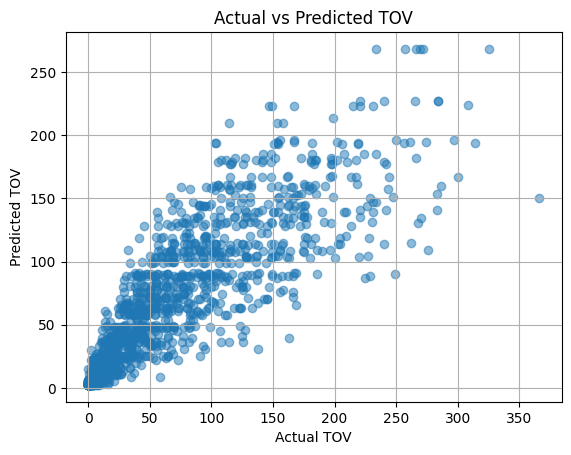

In [224]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual TOV")
plt.ylabel("Predicted TOV")
plt.title("Actual vs Predicted TOV")
plt.grid(True)
plt.show()

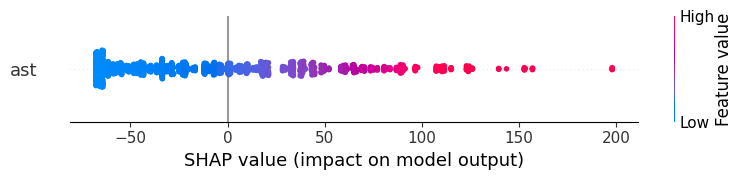

In [225]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

#### Model Exporting

In [226]:
X_test.to_csv('../models/ast_v_tov/X_test.csv', index=False)
y_test.to_csv('../models/ast_v_tov/y_test.csv', index=False)
pd.Series(y_pred).to_csv('../models/ast_v_tov/y_pred.csv', index=False)

In [227]:
model.save_model("../models/ast_v_tov/model.json")

In [228]:
model = xgb.XGBRegressor()
model.load_model("../models/ast_v_tov/model.json")

In [229]:
# dummy_input = [('input', FloatTensorType([None, 1]))]

# onnx_model = convert_sklearn(final_model, initial_types=dummy_input)
# with open("model.onnx", "wb") as f:
#     f.write(onnx_model.SerializeToString())

In [230]:
def predict_tov(model, ast):
    if ast:
        ast = min(ast, 30)
        ast = round(ast * 48.348203)
        ast = min(ast, 1164)
    else:
        ast = round(108.780964)
                
    input_data = pd.DataFrame({'ast': [ast]})
    output = model.predict(input_data)
    
    tov = min(output[0], 464)
    tov = round(tov / 48.348203)
    tov = min(tov, 16)
    return tov

In [231]:
predict_tov(model, 10)

4

### Regression Model: STL & BLK → PF

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

import xgboost as xgb
import optuna

import shap

#### Data Loading

In [233]:
df = pd.read_csv("../data/player_totals.csv")
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})

#### Data Preparing & Data Splitting

In [234]:
df.dropna(subset=['stl', 'blk', 'pf'], inplace=True)

X = df[['stl', 'blk']]
y = df['pf']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

#### Hyperparameter Tuning

In [235]:
def objective(trial):
    params = {
        'objective': 'reg:squarederror',
        'device': 'cuda',
        'tree_method': 'hist',
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10)
    }
    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train, verbose=0)
    preds = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, preds)
    return rmse

In [236]:
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=250)
# best_trial = study.best_trial
# best_params = best_trial.params

In [237]:
# print("Best Hyperparameters:")
# for key, value in best_trial.params.items():
#     print(f"  {key}: {value}")

#### Final Training

In [238]:
best_params = {
    "max_depth": 3,
    "learning_rate": 0.010696205798011393,
    "n_estimators": 532,
    "subsample": 0.5214618357647576,
    "colsample_bytree": 0.5392492930305198,
    "lambda": 5.417984215326458,
    "alpha": 2.929336503927947
}

In [ ]:
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    device='cuda',
    tree_method='hist',
    **best_params
)
model.fit(X_train, y_train)

XGBRegressor(alpha=2.929336503927947, base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5392492930305198, device='cuda',
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             lambda=5.417984215326458, learning_rate=0.010696205798011393,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=532, n_jobs=None, ...)

#### Evaluation Metrics

In [240]:
def cal_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("R2 Score:", r2)
    return y_pred

In [241]:
y_pred = cal_metrics(model, X_test, y_test)

RMSE: 36.207800267303085
MAE: 26.03876328575237
R2 Score: 0.7931311726570129


#### Performance Visualization

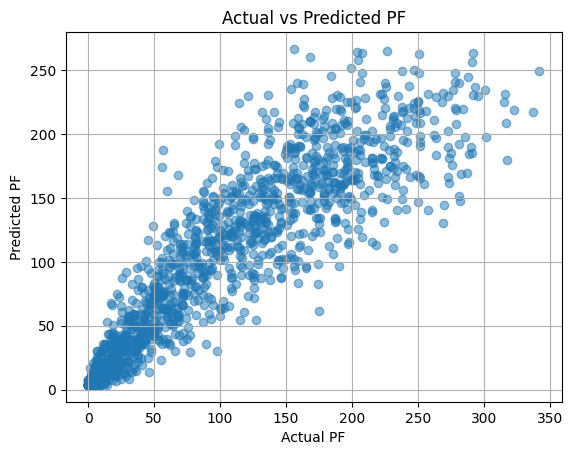

In [243]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual PF")
plt.ylabel("Predicted PF")
plt.title("Actual vs Predicted PF")
plt.grid(True)
plt.show()

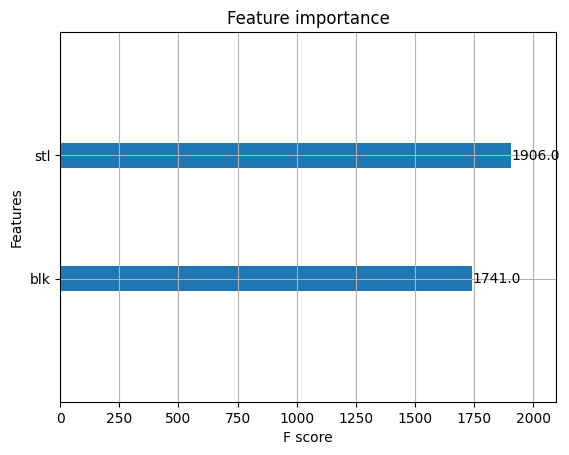

In [242]:
xgb.plot_importance(model)
plt.show()

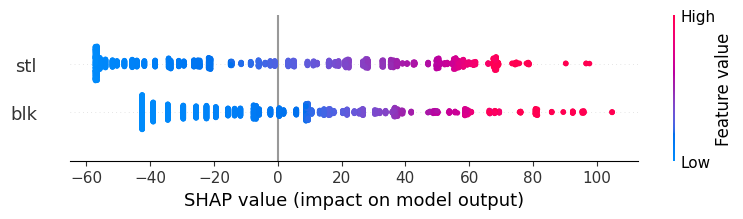

In [244]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

#### Model Exporting

In [245]:
X_test.to_csv('../models/stl_blk_v_pf/X_test.csv', index=False)
y_test.to_csv('../models/stl_blk_v_pf/y_test.csv', index=False)
pd.Series(y_pred).to_csv('../models/stl_blk_v_pf/y_pred.csv', index=False)

In [246]:
model.save_model("../models/stl_blk_v_pf/model.json")

In [247]:
model = xgb.XGBRegressor()
model.load_model("../models/stl_blk_v_pf/model.json")

In [248]:
def predict_pf(model, stl, blk):
    if stl: 
        stl = min(stl, 11)
        stl = round(stl * 48.348203)
        stl = min(stl, 301)
    else:
        stl = round(37.530412)
    
    if blk:
        blk = min(blk, 17)
        blk = round(blk * 48.348203)
        blk = min(blk, 456)
    else:
        blk = round(23.124706)
        
    input_data = pd.DataFrame({'stl': [stl], 'blk': [blk]})
    output = model.predict(input_data)
    
    pf = min(output[0], 386)
    pf = round(pf / 48.348203)
    pf = min(pf, 8)
    return pf

In [249]:
predict_pf(model, 10, 10)

6

### Classification Model: Position

In [237]:
import joblib
import gzip
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.metrics import log_loss, classification_report, confusion_matrix, ConfusionMatrixDisplay

import xgboost as xgb
import optuna

import shap
import onnxmltools
import onnxruntime as ort

#### Data Loading

In [211]:
df = pd.read_csv("../data/player_totals.csv")
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})

#### Data Preparing

In [212]:
df = df[['pos', 
        # 'fg', 'fga', 'fg_percent', 
        # 'fg_percent', 
        # 'e_fg_percent', 
        # 'x2p', 'x2pa', 'x2p_percent',
        'x2p_percent',
        # 'x3p', 'x3pa', 'x3p_percent',
        'x3p_percent',
        # 'ft', 'fta', 'ft_percent',
        'ft_percent',
        # 'orb', 'drb', 'trb',
        'trb',
        # 'ast', 'stl', 'blk', 'tov', 'pf', 'pts',
        'ast', 'stl', 'blk', 'pts']]

df.dropna(inplace=True)

In [213]:
df['pos'] = df['pos'].apply(lambda x: x.split('-')[0] if '-' in x else x)
df = df.astype({'pos': 'string'})

df = df[df['pos'].isin(['PG', 'SG', 'SF', 'PF', 'C'])]

In [214]:
for k, v in df.items():
    print(k, v.dtype)

pos string
x2p_percent float64
x3p_percent float64
ft_percent float64
trb float64
ast int64
stl float64
blk float64
pts int64


In [215]:
print(df.sample(n=10, random_state=42))

      pos  x2p_percent  x3p_percent  ft_percent    trb  ast    stl   blk   pts
6378   SG        0.423        0.343       0.730   90.0   56   32.0  19.0   239
7905   SF        0.478        0.348       0.724  294.0  114   46.0  31.0   846
23136  PG        0.497        0.125       0.820  207.0  610  126.0  10.0  1510
6827   SG        0.316        0.444       0.250    8.0   12    4.0   0.0    37
8743   SF        0.659        0.000       0.500   50.0   13    6.0  24.0    62
17476  SG        0.458        0.077       0.792  161.0  119   30.0  17.0   465
2345   SF        0.438        0.176       0.714   18.0    5    5.0   4.0    52
11983  SF        0.451        0.095       0.791  219.0   77   81.0  10.0   422
252    SF        0.500        0.310       0.857   35.0   14    5.0   6.0   117
8184   PG        0.438        0.316       0.683   32.0   64   12.0   2.0   196


#### Feature Engineering

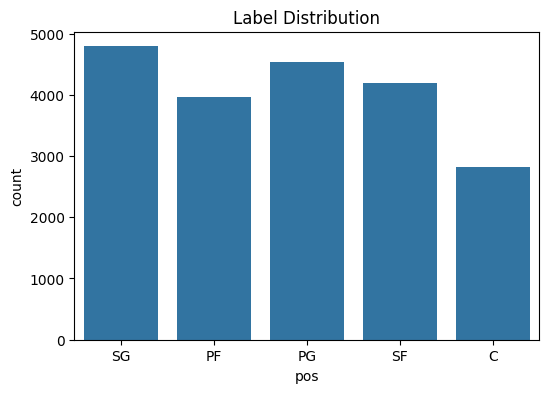

In [216]:
plt.figure(figsize=(6,4))
sns.countplot(x='pos', data=pd.DataFrame(df))
plt.title('Label Distribution')
plt.show()

In [217]:
label_encoder = LabelEncoder()
df['pos_encoded'] = label_encoder.fit_transform(df['pos'])

X = df.drop(columns=['pos', 'pos_encoded'])
y = df['pos_encoded']

#### Data Splitting

In [218]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, stratify=y_val_test, random_state=42)

#### Data Scaling

In [219]:
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#### Hyperparameter Tuning

In [220]:
# def objective(trial):
#     params = {
#         'device': 'cuda',
#         'tree_method': 'hist',
#         'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#         'max_depth': trial.suggest_int('max_depth', 3, 12),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'gamma': trial.suggest_float('gamma', 0, 5),
#         'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0, 1)
#     }
#     model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', **params)
#     model.fit(X_train_scaled, y_train,
#             eval_set=[(X_val_scaled, y_val)], 
#             verbose=0)
#     score = model.score(X_val_scaled, y_val)
#     return score

In [221]:
def objective(trial):
    params = {
        'objective': 'multi:softmax',
        'device': 'cuda',
        'tree_method': 'hist',
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1),
        'early_stopping_rounds': 50,
    }
    
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', **params)
    
    y_train_np = np.array(y_train)
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = []
    
    for train_index, val_index in skf.split(X_train_scaled, y_train_np):
        X_fold_train, X_fold_val = X_train_scaled[train_index], X_train_scaled[val_index]
        y_fold_train, y_fold_val = y_train_np[train_index], y_train_np[val_index]
        
        model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', **params)
        model.fit(
            X_fold_train, y_fold_train,
            eval_set=[(X_fold_val, y_fold_val)],
            verbose=0
        )
        
        y_fold_pred = model.predict_proba(X_fold_val)
        score = log_loss(y_fold_val, y_fold_pred)
        scores.append(score)
    
    return -1 * sum(scores) / len(scores)

In [222]:
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)
# best_trial = study.best_trial
# best_params = best_trial.params

In [223]:
# print("Best Hyperparameters:")
# for key, value in best_trial.params.items():
#     print(f"  {key}: {value}")

#### Final Training

In [224]:
# best_params = {
#     "n_estimators": 998,
#     "max_depth": 4,
#     "learning_rate": 0.044988127661406536,
#     "subsample": 0.5986880261027506,
#     "colsample_bytree": 0.8840729966567867,
#     "gamma": 0.5879993012270742,
#     "reg_alpha": 0.9728734496823839,
#     "reg_lambda": 0.3493505769577766
# }

best_params = {
    "n_estimators": 699,
    "max_depth": 3,
    "learning_rate": 0.16214382011042164,
    "subsample": 0.6879927750830442,
    "colsample_bytree": 0.9552972663153627,
    "gamma": 0.08055405739393251,
    "reg_alpha": 0.46722112186774795,
    "reg_lambda": 0.605235490035828
}

In [225]:
model = xgb.XGBClassifier(
    objective='multi:softprob',
    device = 'cuda',
    tree_method= 'hist',
    eval_metric = 'mlogloss',
    use_label_encoder = False,
    **best_params
)

model.fit(
    X_train_scaled, y_train,
    eval_set=[(X_val_scaled, y_val)],
    verbose=0
)

c:\Users\ASUS\anaconda3\envs\ai\lib\site-packages\xgboost\core.py:158: UserWarning: [13:05:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9552972663153627, device='cuda',
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None,
              gamma=0.08055405739393251, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.16214382011042164,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=699, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

#### Evaluation Metrics

In [226]:
def cal_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    logloss = log_loss(y_test, model.predict_proba(X_test))
    
    print("Log Loss:", logloss)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    return y_pred

In [227]:
y_pred = cal_metrics(model, X_test_scaled, y_test)

Log Loss: 0.8144782242638743
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.62      0.65       141
           1       0.55      0.57      0.56       198
           2       0.83      0.83      0.83       227
           3       0.59      0.52      0.55       210
           4       0.61      0.68      0.65       240

    accuracy                           0.65      1016
   macro avg       0.65      0.65      0.65      1016
weighted avg       0.65      0.65      0.65      1016



#### Performance Visualization

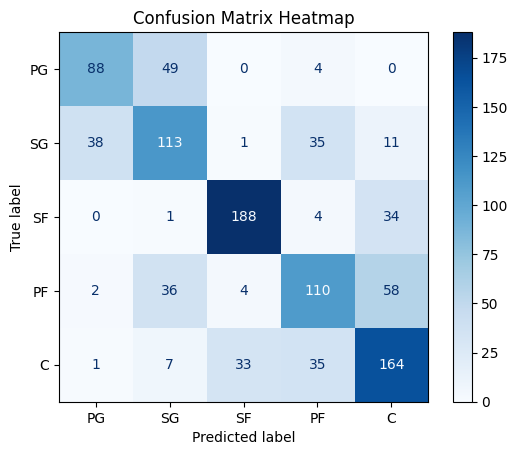

In [228]:
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred, 
    display_labels=['PG', 'SG', 'SF', 'PF', 'C'], 
    cmap='Blues'
)

plt.title("Confusion Matrix Heatmap")
plt.show()

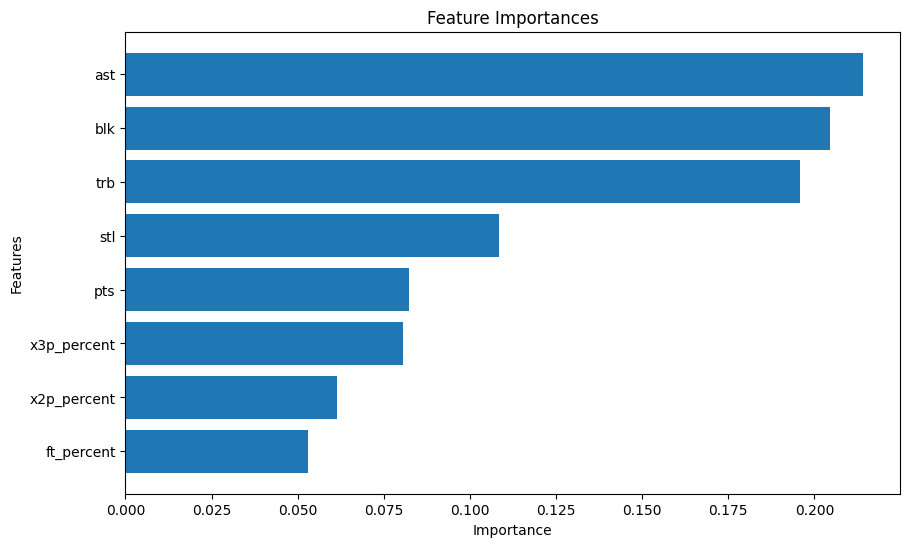

In [229]:
plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(model.feature_importances_)
plt.barh(X_test.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [ ]:
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

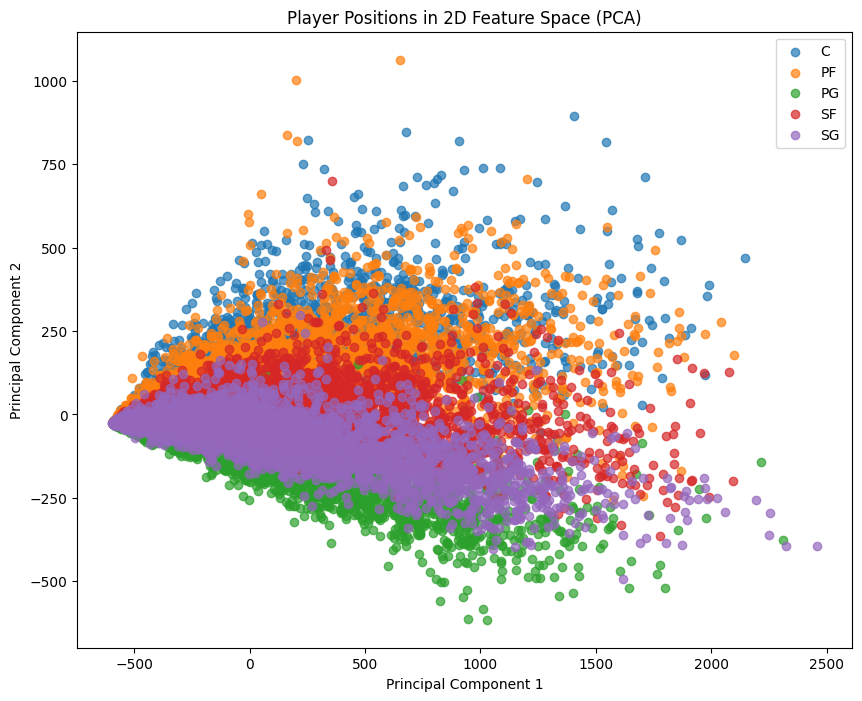

In [245]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 8))
for pos_label in np.unique(y):
    plt.scatter(
        X_pca[y == pos_label, 0],
        X_pca[y == pos_label, 1],
        label=label_encoder.inverse_transform([pos_label])[0],
        alpha=0.7
    )
plt.title("Player Positions in 2D Feature Space (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

#### Model Exporting

In [195]:
X_test.to_csv('../models/mtrcs_v_pos/X_test.csv', index=False)
y_test.to_csv('../models/mtrcs_v_pos/y_test.csv', index=False)
pd.Series(y_pred).to_csv('../models/mtrcs_v_pos/y_pred.csv', index=False)
feature_importance_df.to_csv('../models/mtrcs_v_pos/feature_importance.csv', index=False)

In [196]:
# joblib.dump(label_encoder, '../models/mtrcs_v_pos/label_encoder.pkl')

In [197]:
label_encoder = joblib.load('../models/mtrcs_v_pos/label_encoder.pkl')

In [198]:
# joblib.dump(scaler, '../models/mtrcs_v_pos/scaler.pkl')

In [199]:
scaler = joblib.load('../models/mtrcs_v_pos/scaler.pkl')

In [200]:
# model.save_model("../models/mtrcs_v_pos/model.json")

# with open("../models/mtrcs_v_pos/model.json", "rb") as f_in:
#     with gzip.open("../models/mtrcs_v_pos/model.json.gz", "wb") as f_out:
#         shutil.copyfileobj(f_in, f_out)

In [201]:
# model = xgb.XGBClassifier()

# with gzip.open("../models/mtrcs_v_pos/model.json.gz", "rb") as f_in:
#     with open("../models/mtrcs_v_pos/model.json", "wb") as f_out:
#         shutil.copyfileobj(f_in, f_out)

# model.load_model("../models/mtrcs_v_pos/model.json")

In [202]:
# def predict_pos(model, scaler, label_encoder, ast, blk, trb, stl, pts):
    
#     full_features = np.array([[ast, blk, trb, stl, pts]
#                             + [0.44157819853343555, 0.48112257852686874, 0.4740650651198424, 0.26494139214184087, 0.7438722775528073, 77.27333917040605, 110.99025938491846]])

#     input_scaled = scaler.transform(full_features)

#     pos_encoded = model.predict(input_scaled)

#     predicted_pos = label_encoder.inverse_transform(pos_encoded)

#     return predicted_pos[0]

In [203]:
# initial_type = [('input', onnxmltools.convert.common.data_types.FloatTensorType([None, X_train.shape[1]]))]
# onnx_model = onnxmltools.convert_xgboost(model, initial_types=initial_type)

# with open("../models/mtrcs_v_pos/model.onnx", "wb") as f:
#     f.write(onnx_model.SerializeToString())

In [204]:
model = ort.InferenceSession("../models/mtrcs_v_pos/model.onnx")

In [205]:
def predict_pos(model, scaler, label_encoder, x2p_percent, x3p_percent, ft_percent, trb, ast, stl, blk, pts):
    input_name = model.get_inputs()[0].name
    output_name = model.get_outputs()[0].name
    # print(input_name)
    # print(output_name)

    full_features = np.array([[x2p_percent, x3p_percent, ft_percent, trb, ast, stl, blk, pts]])

    input_scaled = scaler.transform(full_features)

    pos_encoded = model.run([output_name], {input_name: input_scaled.astype(np.float32)})[0]
    if len(pos_encoded.shape) == 1:  # 1D
        predicted_class_index = int(pos_encoded[0])
    else:  # 2D (e.g., Probabilities)
        predicted_class_index = np.argmax(pos_encoded, axis=1)[0]
    predicted_pos = label_encoder.inverse_transform([predicted_class_index])

    return predicted_pos[0]

In [206]:
predicted_position = predict_pos(model, scaler, label_encoder, 0.44157819853343555, 0.48112257852686874, 0.48112257852686874, 10, 1000, 100, 10, 100)
print(f"Predicted Position: {predicted_position}")

Predicted Position: PG


c:\Users\ASUS\anaconda3\envs\ai\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


In [208]:
print(type(y_test))

<class 'pandas.core.series.Series'>


### Player Similarity

In [1]:
import os
import random
import joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
import optuna

import shap

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
set_seed()

#### Data Loading

In [4]:
df = pd.read_csv("../data/player_totals.csv")
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})

In [5]:
print(len(df))

32392


#### Data Preparing

In [5]:
df['pos'] = df['pos'].apply(lambda x: x.split('-')[0] if '-' in x else x)
df = df.astype({'pos': 'string'})

df['pos'] = df['pos'].replace({
    'F': 'SF',
    'G': 'PG'
})

In [6]:
# print(df[~df['pos'].isin(['PG', 'SG', 'SF', 'PF', 'C'])])

In [7]:
stats_columns = [
    'player', 'season', 
    'pos', 'g', 'gs', 'mp', 
    'fg', 'fga', 'fg_percent',
    'x3p', 'x3pa', 'x3p_percent', 
    'x2p', 'x2pa', 'x2p_percent',
    'e_fg_percent', 
    'ft', 'fta', 'ft_percent', 
    'orb', 'drb', 'trb',
    'ast', 'stl', 'blk', 'tov', 'pf', 'pts'
]

df = df[stats_columns]

In [8]:
# for k, v in df.items():
#     # print(k, v.dtype)
#     print(k)

#### Missing Value Handling

In [9]:
print(df[df[['player', 'season', 'pos']].isnull().any(axis=1)])

Empty DataFrame
Columns: [player, season, pos, g, gs, mp, fg, fga, fg_percent, x3p, x3pa, x3p_percent, x2p, x2pa, x2p_percent, e_fg_percent, ft, fta, ft_percent, orb, drb, trb, ast, stl, blk, tov, pf, pts]
Index: []

[0 rows x 28 columns]


In [10]:
df['g'] = df['g'].fillna(0)
print(df[df[['g']].isnull().any(axis=1)])

Empty DataFrame
Columns: [player, season, pos, g, gs, mp, fg, fga, fg_percent, x3p, x3pa, x3p_percent, x2p, x2pa, x2p_percent, e_fg_percent, ft, fta, ft_percent, orb, drb, trb, ast, stl, blk, tov, pf, pts]
Index: []

[0 rows x 28 columns]


In [11]:
df['gs'] = df['gs'].fillna((df['g'] * (24.526553 / 49.530287)).astype(int))
print(df[df[['gs']].isnull().any(axis=1)])

Empty DataFrame
Columns: [player, season, pos, g, gs, mp, fg, fga, fg_percent, x3p, x3pa, x3p_percent, x2p, x2pa, x2p_percent, e_fg_percent, ft, fta, ft_percent, orb, drb, trb, ast, stl, blk, tov, pf, pts]
Index: []

[0 rows x 28 columns]


In [12]:
def fill_missing_mp(group):
    group['mp'] = group['mp'].fillna(group['mp'].mean())
    return group

df = df.groupby('g').apply(fill_missing_mp).reset_index(drop=True)

print(df[df[['mp']].isnull().any(axis=1)])

Empty DataFrame
Columns: [player, season, pos, g, gs, mp, fg, fga, fg_percent, x3p, x3pa, x3p_percent, x2p, x2pa, x2p_percent, e_fg_percent, ft, fta, ft_percent, orb, drb, trb, ast, stl, blk, tov, pf, pts]
Index: []

[0 rows x 28 columns]


In [13]:
df['x2p'] = df['x2p'].fillna(0)
df['x2pa'] = df['x2pa'].fillna(0)
df['x2p_percent'] = df.apply(lambda row: row['x2p'] / row['x2pa'] if row['x2pa'] != 0 else 0, axis=1)


print(df[df[['x2p']].isnull().any(axis=1)])
print(df[df[['x2pa']].isnull().any(axis=1)])
print(df[df[['x2p_percent']].isnull().any(axis=1)])

Empty DataFrame
Columns: [player, season, pos, g, gs, mp, fg, fga, fg_percent, x3p, x3pa, x3p_percent, x2p, x2pa, x2p_percent, e_fg_percent, ft, fta, ft_percent, orb, drb, trb, ast, stl, blk, tov, pf, pts]
Index: []

[0 rows x 28 columns]
Empty DataFrame
Columns: [player, season, pos, g, gs, mp, fg, fga, fg_percent, x3p, x3pa, x3p_percent, x2p, x2pa, x2p_percent, e_fg_percent, ft, fta, ft_percent, orb, drb, trb, ast, stl, blk, tov, pf, pts]
Index: []

[0 rows x 28 columns]
Empty DataFrame
Columns: [player, season, pos, g, gs, mp, fg, fga, fg_percent, x3p, x3pa, x3p_percent, x2p, x2pa, x2p_percent, e_fg_percent, ft, fta, ft_percent, orb, drb, trb, ast, stl, blk, tov, pf, pts]
Index: []

[0 rows x 28 columns]


In [14]:
df['x3p'] = df['x3p'].fillna(0)
df['x3pa'] = df['x3pa'].fillna(0)
df['x3p_percent'] = df.apply(lambda row: row['x3p'] / row['x3pa'] if row['x3pa'] != 0 else 0, axis=1)

print(df[df[['x3p']].isnull().any(axis=1)])
print(df[df[['x3pa']].isnull().any(axis=1)])
print(df[df[['x3p_percent']].isnull().any(axis=1)])

Empty DataFrame
Columns: [player, season, pos, g, gs, mp, fg, fga, fg_percent, x3p, x3pa, x3p_percent, x2p, x2pa, x2p_percent, e_fg_percent, ft, fta, ft_percent, orb, drb, trb, ast, stl, blk, tov, pf, pts]
Index: []

[0 rows x 28 columns]
Empty DataFrame
Columns: [player, season, pos, g, gs, mp, fg, fga, fg_percent, x3p, x3pa, x3p_percent, x2p, x2pa, x2p_percent, e_fg_percent, ft, fta, ft_percent, orb, drb, trb, ast, stl, blk, tov, pf, pts]
Index: []

[0 rows x 28 columns]
Empty DataFrame
Columns: [player, season, pos, g, gs, mp, fg, fga, fg_percent, x3p, x3pa, x3p_percent, x2p, x2pa, x2p_percent, e_fg_percent, ft, fta, ft_percent, orb, drb, trb, ast, stl, blk, tov, pf, pts]
Index: []

[0 rows x 28 columns]


In [15]:
mismatched_fg = df[df['fg'] != (df['x2p'] + df['x3p'])]
print(mismatched_fg)
print(df[df[['fg']].isnull().any(axis=1)])

Empty DataFrame
Columns: [player, season, pos, g, gs, mp, fg, fga, fg_percent, x3p, x3pa, x3p_percent, x2p, x2pa, x2p_percent, e_fg_percent, ft, fta, ft_percent, orb, drb, trb, ast, stl, blk, tov, pf, pts]
Index: []

[0 rows x 28 columns]
Empty DataFrame
Columns: [player, season, pos, g, gs, mp, fg, fga, fg_percent, x3p, x3pa, x3p_percent, x2p, x2pa, x2p_percent, e_fg_percent, ft, fta, ft_percent, orb, drb, trb, ast, stl, blk, tov, pf, pts]
Index: []

[0 rows x 28 columns]


In [16]:
mismatched_fga = df[df['fga'] != (df['x2pa'] + df['x3pa'])]
print(mismatched_fga)
print(df[df[['fga']].isnull().any(axis=1)])

Empty DataFrame
Columns: [player, season, pos, g, gs, mp, fg, fga, fg_percent, x3p, x3pa, x3p_percent, x2p, x2pa, x2p_percent, e_fg_percent, ft, fta, ft_percent, orb, drb, trb, ast, stl, blk, tov, pf, pts]
Index: []

[0 rows x 28 columns]
Empty DataFrame
Columns: [player, season, pos, g, gs, mp, fg, fga, fg_percent, x3p, x3pa, x3p_percent, x2p, x2pa, x2p_percent, e_fg_percent, ft, fta, ft_percent, orb, drb, trb, ast, stl, blk, tov, pf, pts]
Index: []

[0 rows x 28 columns]


In [17]:
df['fg_percent'] = df.apply(lambda row: row['fg'] / row['fga'] if row['fga'] != 0 else 0, axis=1)
print(df[df[['fg_percent']].isnull().any(axis=1)])

mismatched_fg_percent = df[df['fg_percent'] != ((df['x2p'] + df['x3p'])/(df['x2pa'] + df['x3pa']))]
print(mismatched_fga)

Empty DataFrame
Columns: [player, season, pos, g, gs, mp, fg, fga, fg_percent, x3p, x3pa, x3p_percent, x2p, x2pa, x2p_percent, e_fg_percent, ft, fta, ft_percent, orb, drb, trb, ast, stl, blk, tov, pf, pts]
Index: []

[0 rows x 28 columns]
Empty DataFrame
Columns: [player, season, pos, g, gs, mp, fg, fga, fg_percent, x3p, x3pa, x3p_percent, x2p, x2pa, x2p_percent, e_fg_percent, ft, fta, ft_percent, orb, drb, trb, ast, stl, blk, tov, pf, pts]
Index: []

[0 rows x 28 columns]


In [18]:
df['e_fg_percent'] = df.apply(
    lambda row: (row['fg'] + 0.5 * row['x3p']) / row['fga'] if row['fga'] != 0 else 0,
    axis=1
)
print(df[df[['e_fg_percent']].isnull().any(axis=1)])

Empty DataFrame
Columns: [player, season, pos, g, gs, mp, fg, fga, fg_percent, x3p, x3pa, x3p_percent, x2p, x2pa, x2p_percent, e_fg_percent, ft, fta, ft_percent, orb, drb, trb, ast, stl, blk, tov, pf, pts]
Index: []

[0 rows x 28 columns]


In [19]:
df['ft'] = df['ft'].fillna(0)
df['fta'] = df['fta'].fillna(0)
df['ft_percent'] = df.apply(lambda row: row['ft'] / row['fta'] if row['fta'] != 0 else 0, axis=1)

print(df[df[['ft']].isnull().any(axis=1)])
print(df[df[['fta']].isnull().any(axis=1)])
print(df[df[['ft_percent']].isnull().any(axis=1)])

Empty DataFrame
Columns: [player, season, pos, g, gs, mp, fg, fga, fg_percent, x3p, x3pa, x3p_percent, x2p, x2pa, x2p_percent, e_fg_percent, ft, fta, ft_percent, orb, drb, trb, ast, stl, blk, tov, pf, pts]
Index: []

[0 rows x 28 columns]
Empty DataFrame
Columns: [player, season, pos, g, gs, mp, fg, fga, fg_percent, x3p, x3pa, x3p_percent, x2p, x2pa, x2p_percent, e_fg_percent, ft, fta, ft_percent, orb, drb, trb, ast, stl, blk, tov, pf, pts]
Index: []

[0 rows x 28 columns]
Empty DataFrame
Columns: [player, season, pos, g, gs, mp, fg, fga, fg_percent, x3p, x3pa, x3p_percent, x2p, x2pa, x2p_percent, e_fg_percent, ft, fta, ft_percent, orb, drb, trb, ast, stl, blk, tov, pf, pts]
Index: []

[0 rows x 28 columns]


In [20]:
def fill_missing_orb(row, df):
    if np.isnan(row['orb']):
        filtered = df[
            (df['pos'] == row['pos']) &
            (df['mp'] >= row['mp'] - 10) & 
            (df['mp'] <= row['mp'] + 10) &
            (~df['orb'].isna())
        ]
        if not filtered.empty:
            return filtered['orb'].mean()
        else:
            return np.nan
    else:
        return row['orb']

df['orb'] = df.apply(lambda row: fill_missing_orb(row, df), axis=1)

# for col in ['orb']:
#     for idx, row in df[df[col].isnull()].iterrows():
#         pos = row['pos']
#         mp = row['mp']

#         filtered = df[
#             (df['pos'] == pos) &
#             (df['mp'] >= mp - 10) & 
#             (df['mp'] <= mp + 10) &
#             (~df[col].isnull())
#         ]
        
#         if not filtered.empty:
#             mean_value = filtered[col].mean()
#             df.at[idx, col] = mean_value
            
print(df[df[['orb']].isnull().any(axis=1)])

                    player  season pos   g    gs      mp    fg   fga  \
24243     Wilt Chamberlain    1965   C  73  36.0  3301.0  1063  2083   
25948      Oscar Robertson    1966  PG  76  37.0  3493.0   818  1723   
25968         Bill Russell    1962   C  76  37.0  3433.0   575  1258   
27273         Bill Russell    1965   C  78  38.0  3466.0   429   980   
27280         Bill Russell    1964   C  78  38.0  3482.0   466  1077   
27307         Bill Russell    1961   C  78  38.0  3458.0   532  1250   
28060      Oscar Robertson    1969  PG  79  39.0  3461.0   656  1351   
28078      Oscar Robertson    1967  PG  79  39.0  3468.0   838  1699   
28086          Jerry Lucas    1966  PF  79  39.0  3517.0   690  1523   
28095     Wilt Chamberlain    1966   C  79  39.0  3737.0  1074  1990   
28108      Oscar Robertson    1964  PG  79  39.0  3559.0   840  1740   
28130      Oscar Robertson    1962  PG  79  39.0  3503.0   866  1810   
28155     Wilt Chamberlain    1961   C  79  39.0  3773.0  1251  

In [21]:
def fill_missing_drb(row, df):
    if np.isnan(row['drb']):
        filtered = df[
            (df['pos'] == row['pos']) &
            (df['mp'] >= row['mp'] - 10) & 
            (df['mp'] <= row['mp'] + 10) &
            (~df['drb'].isna())
        ]
        if not filtered.empty:
            return filtered['drb'].mean()
        else:
            return np.nan
    else:
        return row['drb']

df['drb'] = df.apply(lambda row: fill_missing_drb(row, df), axis=1)

# for col in ['drb']:
#     for idx, row in df[df[col].isnull()].iterrows():
#         pos = row['pos']
#         mp = row['mp']

#         filtered = df[
#             (df['pos'] == pos) &
#             (df['mp'] >= mp - 10) & 
#             (df['mp'] <= mp + 10) &
#             (~df[col].isnull())
#         ]
        
#         if not filtered.empty:
#             mean_value = filtered[col].mean()
#             df.at[idx, col] = mean_value
            
print(df[df[['drb']].isnull().any(axis=1)])

                    player  season pos   g    gs      mp    fg   fga  \
24243     Wilt Chamberlain    1965   C  73  36.0  3301.0  1063  2083   
25948      Oscar Robertson    1966  PG  76  37.0  3493.0   818  1723   
25968         Bill Russell    1962   C  76  37.0  3433.0   575  1258   
27273         Bill Russell    1965   C  78  38.0  3466.0   429   980   
27280         Bill Russell    1964   C  78  38.0  3482.0   466  1077   
27307         Bill Russell    1961   C  78  38.0  3458.0   532  1250   
28060      Oscar Robertson    1969  PG  79  39.0  3461.0   656  1351   
28078      Oscar Robertson    1967  PG  79  39.0  3468.0   838  1699   
28086          Jerry Lucas    1966  PF  79  39.0  3517.0   690  1523   
28095     Wilt Chamberlain    1966   C  79  39.0  3737.0  1074  1990   
28108      Oscar Robertson    1964  PG  79  39.0  3559.0   840  1740   
28130      Oscar Robertson    1962  PG  79  39.0  3503.0   866  1810   
28155     Wilt Chamberlain    1961   C  79  39.0  3773.0  1251  

In [22]:
df['trb'] = df.apply(lambda row: row['orb'] + row['drb'], axis=1)
print(df[df[['trb']].isnull().any(axis=1)])

                    player  season pos   g    gs      mp    fg   fga  \
24243     Wilt Chamberlain    1965   C  73  36.0  3301.0  1063  2083   
25948      Oscar Robertson    1966  PG  76  37.0  3493.0   818  1723   
25968         Bill Russell    1962   C  76  37.0  3433.0   575  1258   
27273         Bill Russell    1965   C  78  38.0  3466.0   429   980   
27280         Bill Russell    1964   C  78  38.0  3482.0   466  1077   
27307         Bill Russell    1961   C  78  38.0  3458.0   532  1250   
28060      Oscar Robertson    1969  PG  79  39.0  3461.0   656  1351   
28078      Oscar Robertson    1967  PG  79  39.0  3468.0   838  1699   
28086          Jerry Lucas    1966  PF  79  39.0  3517.0   690  1523   
28095     Wilt Chamberlain    1966   C  79  39.0  3737.0  1074  1990   
28108      Oscar Robertson    1964  PG  79  39.0  3559.0   840  1740   
28130      Oscar Robertson    1962  PG  79  39.0  3503.0   866  1810   
28155     Wilt Chamberlain    1961   C  79  39.0  3773.0  1251  

In [23]:
def fill_missing_ast(row, df):
    if np.isnan(row['ast']):
        filtered = df[
            (df['pos'] == row['pos']) &
            (df['mp'] >= row['mp'] - 10) & 
            (df['mp'] <= row['mp'] + 10) &
            (~df['ast'].isna())
        ]
        if not filtered.empty:
            return filtered['ast'].mean()
        else:
            return np.nan
    else:
        return row['ast']

df['ast'] = df.apply(lambda row: fill_missing_ast(row, df), axis=1)

# for col in ['ast']:
#     for idx, row in df[df[col].isnull()].iterrows():
#         pos = row['pos']
#         mp = row['mp']

#         filtered = df[
#             (df['pos'] == pos) &
#             (df['mp'] >= mp - 10) & 
#             (df['mp'] <= mp + 10) &
#             (~df[col].isnull())
#         ]
        
#         if not filtered.empty:
#             mean_value = filtered[col].mean()
#             df.at[idx, col] = mean_value
            
print(df[df[['ast']].isnull().any(axis=1)])

Empty DataFrame
Columns: [player, season, pos, g, gs, mp, fg, fga, fg_percent, x3p, x3pa, x3p_percent, x2p, x2pa, x2p_percent, e_fg_percent, ft, fta, ft_percent, orb, drb, trb, ast, stl, blk, tov, pf, pts]
Index: []

[0 rows x 28 columns]


In [24]:
def fill_missing_stl(row, df):
    if np.isnan(row['stl']):
        filtered = df[
            (df['pos'] == row['pos']) &
            (df['mp'] >= row['mp'] - 10) & 
            (df['mp'] <= row['mp'] + 10) &
            (~df['stl'].isna())
        ]
        if not filtered.empty:
            return filtered['stl'].mean()
        else:
            return np.nan
    else:
        return row['stl']

df['stl'] = df.apply(lambda row: fill_missing_stl(row, df), axis=1)

# for col in ['stl']:
#     for idx, row in df[df[col].isnull()].iterrows():
#         pos = row['pos']
#         mp = row['mp']

#         filtered = df[
#             (df['pos'] == pos) &
#             (df['mp'] >= mp - 10) & 
#             (df['mp'] <= mp + 10) &
#             (~df[col].isnull())
#         ]
        
#         if not filtered.empty:
#             mean_value = filtered[col].mean()
#             df.at[idx, col] = mean_value
            
print(df[df[['stl']].isnull().any(axis=1)])

                    player  season pos   g    gs      mp    fg   fga  \
24243     Wilt Chamberlain    1965   C  73  36.0  3301.0  1063  2083   
25948      Oscar Robertson    1966  PG  76  37.0  3493.0   818  1723   
25968         Bill Russell    1962   C  76  37.0  3433.0   575  1258   
27273         Bill Russell    1965   C  78  38.0  3466.0   429   980   
27280         Bill Russell    1964   C  78  38.0  3482.0   466  1077   
27307         Bill Russell    1961   C  78  38.0  3458.0   532  1250   
27309            Gene Shue    1961  PG  78  38.0  3361.0   650  1545   
28006        Nate Thurmond    1973   C  79  39.0  3419.0   517  1159   
28060      Oscar Robertson    1969  PG  79  39.0  3461.0   656  1351   
28078      Oscar Robertson    1967  PG  79  39.0  3468.0   838  1699   
28086          Jerry Lucas    1966  PF  79  39.0  3517.0   690  1523   
28095     Wilt Chamberlain    1966   C  79  39.0  3737.0  1074  1990   
28108      Oscar Robertson    1964  PG  79  39.0  3559.0   840  

In [25]:
def fill_missing_blk(row, df):
    if np.isnan(row['blk']):
        filtered = df[
            (df['pos'] == row['pos']) &
            (df['mp'] >= row['mp'] - 10) & 
            (df['mp'] <= row['mp'] + 10) &
            (~df['blk'].isna())
        ]
        if not filtered.empty:
            return filtered['blk'].mean()
        else:
            return np.nan
    else:
        return row['blk']

df['blk'] = df.apply(lambda row: fill_missing_blk(row, df), axis=1)

# for col in ['blk']:
#     for idx, row in df[df[col].isnull()].iterrows():
#         pos = row['pos']
#         mp = row['mp']

#         filtered = df[
#             (df['pos'] == pos) &
#             (df['mp'] >= mp - 10) & 
#             (df['mp'] <= mp + 10) &
#             (~df[col].isnull())
#         ]
        
#         if not filtered.empty:
#             mean_value = filtered[col].mean()
#             df.at[idx, col] = mean_value
            
print(df[df[['blk']].isnull().any(axis=1)])

                    player  season pos   g    gs      mp    fg   fga  \
24243     Wilt Chamberlain    1965   C  73  36.0  3301.0  1063  2083   
25948      Oscar Robertson    1966  PG  76  37.0  3493.0   818  1723   
25968         Bill Russell    1962   C  76  37.0  3433.0   575  1258   
27273         Bill Russell    1965   C  78  38.0  3466.0   429   980   
27280         Bill Russell    1964   C  78  38.0  3482.0   466  1077   
27307         Bill Russell    1961   C  78  38.0  3458.0   532  1250   
27309            Gene Shue    1961  PG  78  38.0  3361.0   650  1545   
28006        Nate Thurmond    1973   C  79  39.0  3419.0   517  1159   
28060      Oscar Robertson    1969  PG  79  39.0  3461.0   656  1351   
28078      Oscar Robertson    1967  PG  79  39.0  3468.0   838  1699   
28086          Jerry Lucas    1966  PF  79  39.0  3517.0   690  1523   
28095     Wilt Chamberlain    1966   C  79  39.0  3737.0  1074  1990   
28108      Oscar Robertson    1964  PG  79  39.0  3559.0   840  

In [26]:
def fill_missing_tov(row, df):
    if np.isnan(row['tov']):
        filtered = df[
            (df['pos'] == row['pos']) &
            (df['mp'] >= row['mp'] - 10) & 
            (df['mp'] <= row['mp'] + 10) &
            (~df['tov'].isna())
        ]
        if not filtered.empty:
            return filtered['tov'].mean()
        else:
            return np.nan
    else:
        return row['tov']

df['tov'] = df.apply(lambda row: fill_missing_tov(row, df), axis=1)

# for col in ['tov']:
#     for idx, row in df[df[col].isnull()].iterrows():
#         pos = row['pos']
#         mp = row['mp']

#         filtered = df[
#             (df['pos'] == pos) &
#             (df['mp'] >= mp - 10) & 
#             (df['mp'] <= mp + 10) &
#             (~df[col].isnull())
#         ]
        
#         if not filtered.empty:
#             mean_value = filtered[col].mean()
#             df.at[idx, col] = mean_value
            
print(df[df[['tov']].isnull().any(axis=1)])

                    player  season pos   g    gs      mp    fg   fga  \
23621     Wilt Chamberlain    1960   C  72  35.0  3338.0  1065  2311   
24243     Wilt Chamberlain    1965   C  73  36.0  3301.0  1063  2083   
25948      Oscar Robertson    1966  PG  76  37.0  3493.0   818  1723   
25968         Bill Russell    1962   C  76  37.0  3433.0   575  1258   
27120           Bob McAdoo    1976   C  78  38.0  3328.0   934  1918   
27182        Nate Thurmond    1972   C  78  38.0  3362.0   628  1454   
27273         Bill Russell    1965   C  78  38.0  3466.0   429   980   
27280         Bill Russell    1964   C  78  38.0  3482.0   466  1077   
27307         Bill Russell    1961   C  78  38.0  3458.0   532  1250   
28060      Oscar Robertson    1969  PG  79  39.0  3461.0   656  1351   
28078      Oscar Robertson    1967  PG  79  39.0  3468.0   838  1699   
28086          Jerry Lucas    1966  PF  79  39.0  3517.0   690  1523   
28095     Wilt Chamberlain    1966   C  79  39.0  3737.0  1074  

In [27]:
def fill_missing_pf(row, df):
    if np.isnan(row['pf']):
        filtered = df[
            (df['pos'] == row['pos']) &
            (df['mp'] >= row['mp'] - 10) & 
            (df['mp'] <= row['mp'] + 10) &
            (~df['pf'].isna())
        ]
        if not filtered.empty:
            return filtered['pf'].mean()
        else:
            return np.nan
    else:
        return row['pf']

df['pf'] = df.apply(lambda row: fill_missing_pf(row, df), axis=1)

# for col in ['pf']:
#     for idx, row in df[df[col].isnull()].iterrows():
#         pos = row['pos']
#         mp = row['mp']

#         filtered = df[
#             (df['pos'] == pos) &
#             (df['mp'] >= mp - 10) & 
#             (df['mp'] <= mp + 10) &
#             (~df[col].isnull())
#         ]
        
#         if not filtered.empty:
#             mean_value = filtered[col].mean()
#             df.at[idx, col] = mean_value
            
print(df[df[['pf']].isnull().any(axis=1)])

Empty DataFrame
Columns: [player, season, pos, g, gs, mp, fg, fga, fg_percent, x3p, x3pa, x3p_percent, x2p, x2pa, x2p_percent, e_fg_percent, ft, fta, ft_percent, orb, drb, trb, ast, stl, blk, tov, pf, pts]
Index: []

[0 rows x 28 columns]


In [28]:
def fill_missing_pts(row, df):
    if np.isnan(row['pts']):
        filtered = df[
            (df['pos'] == row['pos']) &
            (df['mp'] >= row['mp'] - 10) & 
            (df['mp'] <= row['mp'] + 10) &
            (~df['pts'].isna())
        ]
        if not filtered.empty:
            return filtered['pts'].mean()
        else:
            return np.nan
    else:
        return row['pts']

df['pts'] = df.apply(lambda row: fill_missing_pts(row, df), axis=1)

# for col in ['pts']:
#     for idx, row in df[df[col].isnull()].iterrows():
#         pos = row['pos']
#         mp = row['mp']

#         filtered = df[
#             (df['pos'] == pos) &
#             (df['mp'] >= mp - 10) & 
#             (df['mp'] <= mp + 10) &
#             (~df[col].isnull())
#         ]
        
#         if not filtered.empty:
#             mean_value = filtered[col].mean()
#             df.at[idx, col] = mean_value
            
print(df[df[['pts']].isnull().any(axis=1)])

Empty DataFrame
Columns: [player, season, pos, g, gs, mp, fg, fga, fg_percent, x3p, x3pa, x3p_percent, x2p, x2pa, x2p_percent, e_fg_percent, ft, fta, ft_percent, orb, drb, trb, ast, stl, blk, tov, pf, pts]
Index: []

[0 rows x 28 columns]


In [29]:
for col in ['orb', 'drb', 'stl', 'blk', 'tov']:
    for idx, row in df[df[col].isnull()].iterrows():
        pos = row['pos']
        mp = row['mp']

        relevant_rows = df[(df['pos'] == pos) & 
                           (df['mp'] >= mp - 200) & 
                           (df['mp'] <= mp + 200) & 
                           (~df[col].isnull())]
        
        mean_value = relevant_rows[col].mean()
        
        df.at[idx, col] = mean_value

In [30]:
df[['season', 'g', 'gs', 'mp', 'x3p', 'x3pa', 'x2p', 'x2pa', 'ft', 'fta', 'orb', 'drb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']] = df[['season', 'g', 'gs', 'mp', 'x3p', 'x3pa', 'x2p', 'x2pa', 'ft', 'fta', 'orb', 'drb', 'ast', 'stl','blk', 'tov', 'pf', 'pts']].astype(np.int64)

In [31]:
# df['x2p_percent'] = df['x2p'] / df['x2pa']
df['x2p_percent'] = df.apply(lambda row: row['x2p'] / row['x2pa'] if row['x2pa'] != 0 else 0, axis=1)
# df['x3p_percent'] = df['x3p'] / df['x3pa']
df['x3p_percent'] = df.apply(lambda row: row['x3p'] / row['x3pa'] if row['x3pa'] != 0 else 0, axis=1) 
df['fg'] = df['x2p'] + df['x3p']           
df['fga'] = df['x2pa'] + df['x3pa']        
# df['fg_percent'] = df['fg'] / df['fga']   
df['fg_percent'] = df.apply(lambda row: row['fg'] / row['fga'] if row['fga'] != 0 else 0, axis=1)
# df['e_fg_percent'] = (df['fg'] + (0.5 * df['x3p'])) / df['fga']
df['e_fg_percent'] = df.apply(
    lambda row: (row['fg'] + 0.5 * row['x3p']) / row['fga'] if row['fga'] != 0 else 0,
    axis=1
)
# df['ft_percent'] = df['ft'] / df['fta']
df['ft_percent'] = df.apply(lambda row: row['ft'] / row['fta'] if row['fta'] != 0 else 0, axis=1)
df['trb'] = df['orb'] + df['drb']

In [32]:
for k, v in df.items():
    print(k, v.dtype)

player string
season int64
pos string
g int64
gs int64
mp int64
fg int64
fga int64
fg_percent float64
x3p int64
x3pa int64
x3p_percent float64
x2p int64
x2pa int64
x2p_percent float64
e_fg_percent float64
ft int64
fta int64
ft_percent float64
orb int64
drb int64
trb int64
ast int64
stl int64
blk int64
tov int64
pf int64
pts int64


In [33]:
print(df[df.isnull().any(axis=1)])

Empty DataFrame
Columns: [player, season, pos, g, gs, mp, fg, fga, fg_percent, x3p, x3pa, x3p_percent, x2p, x2pa, x2p_percent, e_fg_percent, ft, fta, ft_percent, orb, drb, trb, ast, stl, blk, tov, pf, pts]
Index: []

[0 rows x 28 columns]


In [34]:
X = df.drop(['player', 'season'], axis=1)
y = df[['player', 'season']]

#### Data Encoding

```markdown
df_clean = X
```

In [35]:
pos_dummies = pd.get_dummies(X['pos'], prefix='pos')

print(pos_dummies.columns.tolist())

['pos_C', 'pos_PF', 'pos_PG', 'pos_SF', 'pos_SG']


In [36]:
stats_columns = [
    # 'player', 'season',
    'pos', 'g', 'gs', 'mp', 
    'fg', 'fga', 'fg_percent',
    'x3p', 'x3pa', 'x3p_percent', 
    'x2p', 'x2pa', 'x2p_percent',
    'e_fg_percent', 
    'ft', 'fta', 'ft_percent', 
    'orb', 'drb', 'trb',
    'ast', 'stl', 'blk', 'tov', 'pf', 'pts'
]

num_columns = [col for col in stats_columns if col != 'pos']
X_num = X[num_columns].copy()

In [37]:
X_combined = pd.concat([pos_dummies, X_num.reset_index(drop=True)], axis=1)

#### Data Scaling

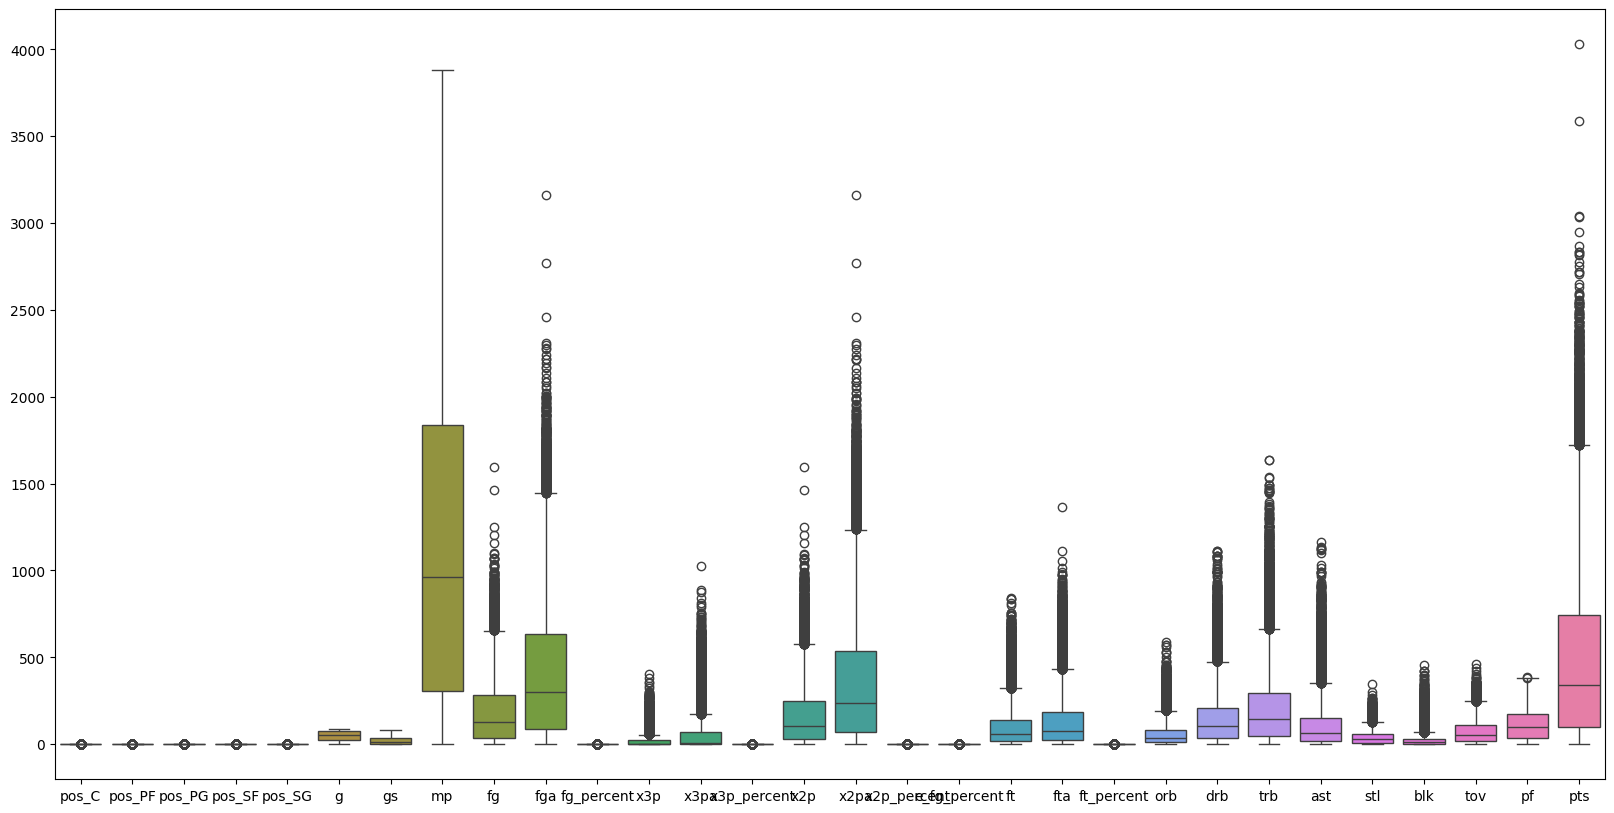

In [38]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=X_combined)
plt.show()

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

In [40]:
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Original Dimension:", X_scaled.shape[1], 
    "Reduced Dimension:", X_pca.shape[1])

Original Dimension: 30 Reduced Dimension: 12


In [41]:
X['identifier'] = y['player'] + "_" + y['season'].astype(str)

#### Dataset and DataLoader

In [42]:
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)

In [43]:
dataset = TensorDataset(X_tensor)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

#### Model Definition

In [44]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        # Encoder Module for Compressing Input Features
        self.encoder = nn.Sequential(
            # Fully Connected Layer for Dimensionality Reduction (Input → 64)
            nn.Linear(input_dim, 64),
            # Activation Layer for Non-Linear Transformation
            nn.ReLU(),
            # Fully Connected Layer for Dimensionality Reduction (64 → 32)
            nn.Linear(64, 32),
            # Activation Layer for Non-Linear Transformation
            nn.ReLU(),
            # Fully Connected Layer for Latent Space Representation (32 → Latent Dim)
            nn.Linear(32, latent_dim)
        )
        # Decoder Module for Reconstructing Input Features
        self.decoder = nn.Sequential(
            # Fully Connected Layer for Dimensionality Expansion (Latent Dim → 32)
            nn.Linear(latent_dim, 32),
            # Activation Layer for Non-Linear Transformation
            nn.ReLU(),
            # Fully Connected Layer for Dimensionality Expansion (32 → 64)
            nn.Linear(32, 64),
            # Activation Layer for Non-Linear Transformation
            nn.ReLU(),
            # Fully Connected Layer for Final Reconstruction (64 → Input Dim)
            nn.Linear(64, input_dim)
        )
        
    def forward(self, x):
        # Encoding of Input Features to Latent Representation
        latent = self.encoder(x)
        # Decoding of Latent Representation to Reconstruct Input Features
        reconstruction = self.decoder(latent)
        return reconstruction, latent


#### Training Function

In [45]:
def train_model(model, X_tensor, dataloader, criterion, optimizer, num_epochs=50):
    history = []
    
    model.train()
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for batch in dataloader:
            inputs = batch[0].to(device)
            optimizer.zero_grad()
            reconstruction, _ = model(inputs)
            loss = criterion(reconstruction, inputs)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item() * inputs.size(0)
        epoch_loss /= 32392
        history.append(epoch_loss)
        print(f"epoch: {epoch+1}/{num_epochs}, train loss: {epoch_loss:.4f}")
    
    model.eval()
    with torch.no_grad():
        _, latent_reps = model(X_tensor.to(device))
    latent_reps = latent_reps.cpu().numpy()
    
    return latent_reps, history

#### KFold Evaluation Function

In [46]:
def evaluate_kfold(X_scaled, input_dim, latent_dim, num_epochs=50, learning_rate=1e-3, batch_size=128, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    cv_losses = []
    
    for fold, (train_index, val_index) in enumerate(kf.split(X_scaled), 1):
        X_train, X_val = X_scaled[train_index], X_scaled[val_index]
        train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
        val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
        
        train_dataset = TensorDataset(train_tensor)
        val_dataset = TensorDataset(val_tensor)
        
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size)
        
        fold_model = Autoencoder(input_dim, latent_dim).to(device)
        fold_optimizer = optim.Adam(fold_model.parameters(), lr=learning_rate)
        criterion = nn.MSELoss()
        
        for epoch in range(num_epochs):
            fold_model.train()
            for batch in train_loader:
                inputs = batch[0]
                fold_optimizer.zero_grad()
                reconstruction, _ = fold_model(inputs)
                loss = criterion(reconstruction, inputs)
                loss.backward()
                fold_optimizer.step()
        
        fold_model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch in val_loader:
                inputs = batch[0]
                reconstruction, _ = fold_model(inputs)
                loss = criterion(reconstruction, inputs)
                val_loss += loss.item() * inputs.size(0)
        val_loss /= len(val_dataset)
        cv_losses.append(val_loss)
        # print(f"[CV] Fold {fold}, Validation Loss: {val_loss:.4f}")
    
    return cv_losses

#### Hyperparameter Tuning

In [47]:
def objective(trial):
    latent_dim = trial.suggest_int("latent_dim", 8, 32)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
    num_epochs = trial.suggest_int("num_epochs", 30, 70)
    input_dim = X_scaled.shape[1]
    
    cv_losses = evaluate_kfold(X_scaled, input_dim, latent_dim,
                                     num_epochs=num_epochs,
                                     learning_rate=learning_rate,
                                     batch_size=128,
                                     n_splits=3)
    mean_cv_loss = np.mean(cv_losses)
    return mean_cv_loss

In [48]:
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=20)
# best_trial = study.best_trial
# best_params = best_trial.params

In [49]:
# print("Best Hyperparameters:")
# for key, value in best_trial.params.items():
#     print(f"  {key}: {value}")

In [50]:
best_params = {
    "latent_dim": 25,
    "learning_rate": 0.007262494401279974,
    "num_epochs": 59
}

#### Final Training

In [51]:
latent_dim = best_params["latent_dim"]
lr = best_params["learning_rate"]
num_epochs = best_params["num_epochs"]
input_dim = X_scaled.shape[1]

model = Autoencoder(input_dim, latent_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

In [52]:
latent_reps, history = train_model(model, X_tensor, dataloader, criterion, optimizer, num_epochs=num_epochs)

epoch: 1/59, train loss: 0.1683
epoch: 2/59, train loss: 0.0443
epoch: 3/59, train loss: 0.0276
epoch: 4/59, train loss: 0.0178
epoch: 5/59, train loss: 0.0135
epoch: 6/59, train loss: 0.0111
epoch: 7/59, train loss: 0.0086
epoch: 8/59, train loss: 0.0077
epoch: 9/59, train loss: 0.0082
epoch: 10/59, train loss: 0.0051
epoch: 11/59, train loss: 0.0044
epoch: 12/59, train loss: 0.0044
epoch: 13/59, train loss: 0.0045
epoch: 14/59, train loss: 0.0087
epoch: 15/59, train loss: 0.0034
epoch: 16/59, train loss: 0.0027
epoch: 17/59, train loss: 0.0025
epoch: 18/59, train loss: 0.0053
epoch: 19/59, train loss: 0.0079
epoch: 20/59, train loss: 0.0023
epoch: 21/59, train loss: 0.0025
epoch: 22/59, train loss: 0.0024
epoch: 23/59, train loss: 0.0066
epoch: 24/59, train loss: 0.0022
epoch: 25/59, train loss: 0.0020
epoch: 26/59, train loss: 0.0066
epoch: 27/59, train loss: 0.0046
epoch: 28/59, train loss: 0.0017
epoch: 29/59, train loss: 0.0021
epoch: 30/59, train loss: 0.0062
epoch: 31/59, train

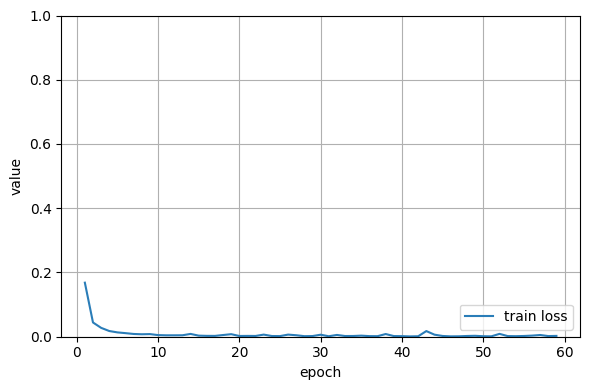

In [53]:
epochs_range = range(1, num_epochs + 1)
plt.figure(figsize=(6, 4))

plt.plot(epochs_range, history, label='train loss', linestyle='-', color='#2a7db8')
plt.xlabel('epoch')
plt.ylabel('value')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()

plt.show()

#### Performance Visualization

#### Model Exporting

In [666]:
# joblib.dump(latent_reps, '../models/player_sims/latent_reps.pkl')

In [6]:
latent_reps = joblib.load('../models/player_sims/latent_reps.pkl')

In [668]:
# player_season = X[['player', 'season']]
# player_season.to_csv('../models/player_sims/player_season.csv', index=False)

In [669]:
# player_season = pd.read_csv('../models/player_sims/player_season.csv')

In [670]:
# X['player'] = y['player']
# X['season'] = y['season']

# X = X.drop('identifier', axis=1)

In [671]:
# X.to_csv('../models/player_sims/X.csv', index=False)

In [7]:
X = pd.read_csv('../models/player_sims/X.csv')

In [8]:
knn = NearestNeighbors(n_neighbors=75, metric='euclidean', algorithm='auto')
knn.fit(latent_reps)

NearestNeighbors(metric='euclidean', n_neighbors=75)

In [13]:
# def find_similar_players(player_name, season, embeddings, knn, X, top_n, allow_same_player, max_other_player):
#     query_df = X[(X['player'] == player_name) & (X['season'] == season)]
#     if query_df.empty:
#         print(f"No record found for {player_name} in season {season}.")
#         return pd.DataFrame(), pd.DataFrame()
    
#     query_idx = query_df.index[0]
#     current_neighbors = max(top_n + 5, 50)
#     similar = []
#     player_count = {}

#     while len(similar) < top_n:
#         knn.set_params(n_neighbors=current_neighbors)
#         distances, indices = knn.kneighbors(embeddings[query_idx].reshape(1, -1))
        
#         for i, dist in zip(indices[0], distances[0]):
#             if len(similar) >= top_n:
#                 break
#             if i == query_idx:
#                 continue
#             if not allow_same_player and X.iloc[i]['player'] == player_name:
#                 continue
            
#             player_name_i = X.iloc[i]['player']
#             season_i = X.iloc[i]['season']
#             constructed_identifier = f"{player_name_i}_{season_i}"
            
#             if constructed_identifier in [s[0] for s in similar]:
#                 continue
#             if max_other_player is not None:
#                 if player_name_i != player_name and player_count.get(player_name_i, 0) >= max_other_player:
#                     continue
#             similar.append((i, dist))
#             if player_name_i != player_name:
#                 player_count[player_name_i] = player_count.get(player_name_i, 0) + 1
        
#         current_neighbors += 5
    
#     result_df = X.iloc[[idx for idx, _ in similar]].copy()
#     result_df['Distance'] = [dist for _, dist in similar]
    
#     n_samples = len(similar) + 1
#     perplexity = min(30, n_samples - 1) if n_samples > 1 else 1
#     all_embeddings = np.vstack([embeddings[query_idx], embeddings[[idx for idx, _ in similar]]])
    
#     tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
#     reduced_embeddings = tsne.fit_transform(all_embeddings)
    
#     visualization_df = pd.DataFrame({
#         'x': reduced_embeddings[:, 0],
#         'y': reduced_embeddings[:, 1],
#         'Title': pd.concat(
#             [pd.Series([f"{player_name} ({season})"]), 
#              X.iloc[[idx for idx, _ in similar]]['player'] + " (" + X.iloc[[idx for idx, _ in similar]]['season'].astype(str)+ ")"]
#         ).reset_index(drop=True),
#         'Similarity': pd.concat(
#             [pd.Series([100.0]), 
#              pd.Series([100 - dist for _, dist in similar])]
#         ).reset_index(drop=True)
#     })
    
#     return result_df.reset_index(drop=True), visualization_df

In [20]:
# similar_list, vis_df = find_similar_players("Magic Johnson", 1987, latent_reps, knn, X, top_n=20, allow_same_player=False, max_other_player=2)

In [17]:
def predict_sim_players(player_name, season, embeddings, knn, X, top_n, allow_same_player=False, max_other_player=1):
    query_df = X[(X['player'] == player_name) & (X['season'] == season)]
    if query_df.empty:
        return pd.DataFrame(), pd.DataFrame()
    
    query_idx = query_df.index[0]
    current_neighbors = max(top_n + 5, 50)
    similar = []
    player_count = {}

    while len(similar) < top_n:
        knn.set_params(n_neighbors=current_neighbors)
        distances, indices = knn.kneighbors(embeddings[query_idx].reshape(1, -1))
        
        for i, dist in zip(indices[0], distances[0]):
            if len(similar) >= top_n:
                break
            if i == query_idx:
                continue
            if not allow_same_player and X.iloc[i]['player'] == player_name:
                continue
            
            player_name_i = X.iloc[i]['player']
            season_i = X.iloc[i]['season']
            constructed_identifier = f"{player_name_i}_{season_i}"
            
            if constructed_identifier in [s[0] for s in similar]:
                continue
            if max_other_player is not None:
                if player_name_i != player_name and player_count.get(player_name_i, 0) >= max_other_player:
                    continue
            similar.append((i, dist))
            if player_name_i != player_name:
                player_count[player_name_i] = player_count.get(player_name_i, 0) + 1
        
        current_neighbors += 5
    
    result_df = X.iloc[[idx for idx, _ in similar]].copy()
    result_df['distance'] = [dist for _, dist in similar]
    
    return result_df.reset_index(drop=True), similar, query_idx

In [28]:
def visualize_sim_players(player_name, season, embeddings, similar, query_idx):
    n_samples = len(similar) + 1
    perplexity = min(30, n_samples - 1) if n_samples > 1 else 1
    all_embeddings = np.vstack([embeddings[query_idx], embeddings[[idx for idx, _ in similar]]])
    
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    reduced_embeddings = tsne.fit_transform(all_embeddings)
    
    visualization_df = pd.DataFrame({
        'x': reduced_embeddings[:, 0],
        'y': reduced_embeddings[:, 1],
        'Title': pd.concat(
            [pd.Series([f"{player_name} ({season})"]), 
            X.iloc[[idx for idx, _ in similar]]['player'] + " (" + X.iloc[[idx for idx, _ in similar]]['season'].astype(str)+ ")"]
        ).reset_index(drop=True),
        'Similarity': pd.concat(
            [pd.Series([100.0]), 
            pd.Series([100 - dist for _, dist in similar])]
        ).reset_index(drop=True)
    })
    return visualization_df

In [19]:
result_df, similar, query_idx = predict_sim_players("Michael Jordan", 1990, latent_reps, knn, X, 10)

In [29]:
visualization_df = visualize_sim_players("Michael Jordan", 1990, latent_reps, similar, query_idx)

In [11]:
display(result_df)

,pos,g,gs,mp,fg,fga,fg_percent,x3p,x3pa,x3p_percent,...,trb,ast,stl,blk,tov,pf,pts,player,season,Distance
0,PG,81,81,3179,570,1128,0.505319,2,22,0.090909,...,340,991,135,24,322,226,1650,Kevin Johnson,1989,1.854834
1,PG,74,74,2782,578,1159,0.498706,8,41,0.195122,...,270,846,95,14,263,143,1665,Kevin Johnson,1990,1.946203
2,PG,81,81,3013,626,1353,0.462676,19,98,0.193878,...,319,813,153,20,343,251,1671,Isiah Thomas,1987,2.625961
3,PG,81,81,3023,474,1045,0.453589,22,87,0.252874,...,379,882,126,34,245,228,1335,Andre Miller,2002,2.678075
4,PG,76,76,3020,490,1130,0.433628,12,48,0.250000,...,405,801,126,25,266,182,1349,Rod Strickland,1998,2.695580
5,PG,82,58,2889,528,1093,0.483074,2,10,0.200000,...,370,740,147,24,257,171,1411,Rod Strickland,1994,2.730185
6,PG,77,77,2790,609,1248,0.487981,26,84,0.309524,...,277,830,171,20,289,245,1609,Isiah Thomas,1986,2.797283
7,PG,82,82,2847,614,1390,0.441727,34,103,0.330097,...,379,670,155,30,316,207,1793,Russell Westbrook,2011,2.806568
8,PG,82,82,3064,503,1030,0.488350,73,190,0.384211,...,268,848,146,18,280,199,1541,Sleepy Floyd,1987,2.841118
9,PG,78,78,2836,647,1435,0.450871,89,272,0.327206,...,326,831,157,49,322,151,1805,John Wall,2017,2.895380


In [12]:
display(visualization_df)

,x,y,Title,Similarity
0,2.330024,22.013336,Magic Johnson (1987),100.000000
1,11.997927,59.869183,Kevin Johnson (1989),98.145166
2,-55.140167,-77.126862,Kevin Johnson (1990),98.053797
3,4.118938,-14.751751,Isiah Thomas (1987),97.374039
4,-22.575228,-45.239292,Andre Miller (2002),97.321925
5,-74.305679,65.590858,Rod Strickland (1998),97.304420
6,42.173199,27.019577,Rod Strickland (1994),97.269815
7,86.111961,19.856524,Isiah Thomas (1986),97.202717
8,-63.607365,-31.129648,Russell Westbrook (2011),97.193432
9,-28.475430,88.906601,Sleepy Floyd (1987),97.158882


### Player Archetypes

In [108]:
import json
import joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

import onnxruntime as ort

In [ ]:
sns.set(style="whitegrid")
%matplotlib inline

In [54]:
def set_seed(seed=42):
    # random.seed(seed)
    np.random.seed(seed)
    # torch.manual_seed(seed)
    # if torch.cuda.is_available():
    #     torch.cuda.manual_seed_all(seed)
set_seed()

#### Data Loading

In [55]:
df = pd.read_csv("../data/player_totals.csv")
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})

#### Data Preparing

In [56]:
df['pos'] = df['pos'].apply(lambda x: x.split('-')[0] if '-' in x else x)
df = df.astype({'pos': 'string'})

In [57]:
label_encoder = joblib.load('../models/mtrcs_v_pos/label_encoder.pkl')
scaler = joblib.load('../models/mtrcs_v_pos/scaler.pkl')
model = ort.InferenceSession("../models/mtrcs_v_pos/model.onnx")


def predict_pos(model, scaler, label_encoder, x2p_percent, x3p_percent, ft_percent, trb, ast, stl, blk, pts):
    input_name = model.get_inputs()[0].name
    output_name = model.get_outputs()[0].name
    full_features = np.array([[x2p_percent, x3p_percent, ft_percent, trb, ast, stl, blk, pts]])

    input_scaled = scaler.transform(full_features)

    pos_encoded = model.run([output_name], {input_name: input_scaled.astype(np.float32)})[0]
    if len(pos_encoded.shape) == 1:  # 1D
        predicted_class_index = int(pos_encoded[0])
    else:  # 2D (e.g., Probabilities)
        predicted_class_index = np.argmax(pos_encoded, axis=1)[0]
    predicted_pos = label_encoder.inverse_transform([predicted_class_index])

    return predicted_pos[0]


def update_pos(df, model, scaler, label_encoder):
    mask = df['pos'].isin(['F', 'G'])
    df.loc[mask, 'pos'] = df[mask].apply(
        lambda row: predict_pos(
            model,
            scaler,
            label_encoder,
            row['x2p_percent'],
            row['x3p_percent'],
            row['ft_percent'],
            row['trb'],
            row['ast'],
            row['stl'],
            row['blk'],
            row['pts']
        ),
        axis=1
    )
    return df


df = update_pos(df, model, scaler, label_encoder)

c:\Users\ASUS\anaconda3\envs\ai\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\ai\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\ai\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\ai\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\ai\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\ai\lib\site-packages\sklearn\base.py:493: User

In [58]:
# print(df[~df['pos'].isin(['PG', 'SG', 'SF', 'PF', 'C'])])

In [59]:
stats_columns = [
    'player', 'season', 
    'pos', 'g', 'gs', 'mp', 
    'fg', 'fga', 'fg_percent',
    'x3p', 'x3pa', 'x3p_percent', 
    'x2p', 'x2pa', 'x2p_percent',
    'e_fg_percent', 
    'ft', 'fta', 'ft_percent', 
    'orb', 'drb', 'trb',
    'ast', 'stl', 'blk', 'tov', 'pf', 'pts'
]

df = df[stats_columns]

#### Missing Value Handling

In [60]:
df['g'] = df['g'].fillna(0)
df['gs'] = df['gs'].fillna((df['g'] * (24.526553 / 49.530287)).astype(int))

def fill_missing_mp(group):
    group['mp'] = group['mp'].fillna(group['mp'].mean())
    return group
df = df.groupby('g').apply(fill_missing_mp).reset_index(drop=True)

In [61]:
df['x2p'] = df['x2p'].fillna(0)
df['x2pa'] = df['x2pa'].fillna(0)
df['x2p_percent'] = df.apply(lambda row: row['x2p'] / row['x2pa'] if row['x2pa'] != 0 else 0, axis=1)

In [62]:
df['x3p'] = df['x3p'].fillna(0)
df['x3pa'] = df['x3pa'].fillna(0)
df['x3p_percent'] = df.apply(lambda row: row['x3p'] / row['x3pa'] if row['x3pa'] != 0 else 0, axis=1)

In [63]:
df['fg_percent'] = df.apply(lambda row: row['fg'] / row['fga'] if row['fga'] != 0 else 0, axis=1)

df['e_fg_percent'] = df.apply(
    lambda row: (row['fg'] + 0.5 * row['x3p']) / row['fga'] if row['fga'] != 0 else 0,
    axis=1
)

In [64]:
df['ft'] = df['ft'].fillna(0)
df['fta'] = df['fta'].fillna(0)
df['ft_percent'] = df.apply(lambda row: row['ft'] / row['fta'] if row['fta'] != 0 else 0, axis=1)

In [65]:
def fill_missing_orb(row, df):
    if np.isnan(row['orb']):
        filtered = df[
            (df['pos'] == row['pos']) &
            (df['mp'] >= row['mp'] - 10) & 
            (df['mp'] <= row['mp'] + 10) &
            (~df['orb'].isna())
        ]
        if not filtered.empty:
            return filtered['orb'].mean()
        else:
            return np.nan
    else:
        return row['orb']

df['orb'] = df.apply(lambda row: fill_missing_orb(row, df), axis=1)

In [66]:
def fill_missing_drb(row, df):
    if np.isnan(row['drb']):
        filtered = df[
            (df['pos'] == row['pos']) &
            (df['mp'] >= row['mp'] - 10) & 
            (df['mp'] <= row['mp'] + 10) &
            (~df['drb'].isna())
        ]
        if not filtered.empty:
            return filtered['drb'].mean()
        else:
            return np.nan
    else:
        return row['drb']

df['drb'] = df.apply(lambda row: fill_missing_drb(row, df), axis=1)

In [67]:
df['trb'] = df.apply(lambda row: row['orb'] + row['drb'], axis=1)

In [68]:
def fill_missing_ast(row, df):
    if np.isnan(row['ast']):
        filtered = df[
            (df['pos'] == row['pos']) &
            (df['mp'] >= row['mp'] - 10) & 
            (df['mp'] <= row['mp'] + 10) &
            (~df['ast'].isna())
        ]
        if not filtered.empty:
            return filtered['ast'].mean()
        else:
            return np.nan
    else:
        return row['ast']

df['ast'] = df.apply(lambda row: fill_missing_ast(row, df), axis=1)

In [69]:
def fill_missing_stl(row, df):
    if np.isnan(row['stl']):
        filtered = df[
            (df['pos'] == row['pos']) &
            (df['mp'] >= row['mp'] - 10) & 
            (df['mp'] <= row['mp'] + 10) &
            (~df['stl'].isna())
        ]
        if not filtered.empty:
            return filtered['stl'].mean()
        else:
            return np.nan
    else:
        return row['stl']

df['stl'] = df.apply(lambda row: fill_missing_stl(row, df), axis=1)

In [70]:
def fill_missing_blk(row, df):
    if np.isnan(row['blk']):
        filtered = df[
            (df['pos'] == row['pos']) &
            (df['mp'] >= row['mp'] - 10) & 
            (df['mp'] <= row['mp'] + 10) &
            (~df['blk'].isna())
        ]
        if not filtered.empty:
            return filtered['blk'].mean()
        else:
            return np.nan
    else:
        return row['blk']

df['blk'] = df.apply(lambda row: fill_missing_blk(row, df), axis=1)

In [71]:
def fill_missing_tov(row, df):
    if np.isnan(row['tov']):
        filtered = df[
            (df['pos'] == row['pos']) &
            (df['mp'] >= row['mp'] - 10) & 
            (df['mp'] <= row['mp'] + 10) &
            (~df['tov'].isna())
        ]
        if not filtered.empty:
            return filtered['tov'].mean()
        else:
            return np.nan
    else:
        return row['tov']

df['tov'] = df.apply(lambda row: fill_missing_tov(row, df), axis=1)

In [72]:
def fill_missing_pf(row, df):
    if np.isnan(row['pf']):
        filtered = df[
            (df['pos'] == row['pos']) &
            (df['mp'] >= row['mp'] - 10) & 
            (df['mp'] <= row['mp'] + 10) &
            (~df['pf'].isna())
        ]
        if not filtered.empty:
            return filtered['pf'].mean()
        else:
            return np.nan
    else:
        return row['pf']

df['pf'] = df.apply(lambda row: fill_missing_pf(row, df), axis=1)

In [73]:
def fill_missing_pts(row, df):
    if np.isnan(row['pts']):
        filtered = df[
            (df['pos'] == row['pos']) &
            (df['mp'] >= row['mp'] - 10) & 
            (df['mp'] <= row['mp'] + 10) &
            (~df['pts'].isna())
        ]
        if not filtered.empty:
            return filtered['pts'].mean()
        else:
            return np.nan
    else:
        return row['pts']

df['pts'] = df.apply(lambda row: fill_missing_pts(row, df), axis=1)

In [74]:
print(df[df.isnull().any(axis=1)])

                 player  season pos   g    gs      mp    fg   fga  fg_percent  \
23621  Wilt Chamberlain    1960   C  72  35.0  3338.0  1065  2311    0.460839   
24243  Wilt Chamberlain    1965   C  73  36.0  3301.0  1063  2083    0.510322   
25948   Oscar Robertson    1966  PG  76  37.0  3493.0   818  1723    0.474753   
25968      Bill Russell    1962   C  76  37.0  3433.0   575  1258    0.457075   
27120        Bob McAdoo    1976   C  78  38.0  3328.0   934  1918    0.486966   
...                 ...     ...  ..  ..   ...     ...   ...   ...         ...   
32350       Larry Jones    1971  SG  84  41.0  3611.0   764  1636    0.466993   
32357      Donald Sidle    1970  PF  84  41.0  3493.0   639  1320    0.484091   
32358      Gerald Govan    1970   C  84  41.0  3701.0   422  1044    0.404215   
32367       Roger Brown    1970  SF  84  41.0  3495.0   719  1444    0.497922   
32369   Spencer Haywood    1970   C  84  41.0  3808.0   986  1998    0.493493   

        x3p  ...  ft_percen

In [75]:
for col in ['orb', 'drb', 'stl', 'blk', 'tov']:
    for idx, row in df[df[col].isnull()].iterrows():
        pos = row['pos']
        mp = row['mp']

        relevant_rows = df[(df['pos'] == pos) & 
                           (df['mp'] >= mp - 200) & 
                           (df['mp'] <= mp + 200) & 
                           (~df[col].isnull())]
        
        mean_value = relevant_rows[col].mean()
        
        df.at[idx, col] = mean_value

In [76]:
df[['season', 'g', 'gs', 'mp', 'x3p', 'x3pa', 'x2p', 'x2pa', 'ft', 'fta', 'orb', 'drb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']] = df[['season', 'g', 'gs', 'mp', 'x3p', 'x3pa', 'x2p', 'x2pa', 'ft', 'fta', 'orb', 'drb', 'ast', 'stl','blk', 'tov', 'pf', 'pts']].astype(np.int64)

In [77]:
# df['x2p_percent'] = df['x2p'] / df['x2pa']
df['x2p_percent'] = df.apply(lambda row: row['x2p'] / row['x2pa'] if row['x2pa'] != 0 else 0, axis=1)
# df['x3p_percent'] = df['x3p'] / df['x3pa']
df['x3p_percent'] = df.apply(lambda row: row['x3p'] / row['x3pa'] if row['x3pa'] != 0 else 0, axis=1) 
df['fg'] = df['x2p'] + df['x3p']           
df['fga'] = df['x2pa'] + df['x3pa']        
# df['fg_percent'] = df['fg'] / df['fga']   
df['fg_percent'] = df.apply(lambda row: row['fg'] / row['fga'] if row['fga'] != 0 else 0, axis=1)
# df['e_fg_percent'] = (df['fg'] + (0.5 * df['x3p'])) / df['fga']
df['e_fg_percent'] = df.apply(
    lambda row: (row['fg'] + 0.5 * row['x3p']) / row['fga'] if row['fga'] != 0 else 0,
    axis=1
)
# df['ft_percent'] = df['ft'] / df['fta']
df['ft_percent'] = df.apply(lambda row: row['ft'] / row['fta'] if row['fta'] != 0 else 0, axis=1)
df['trb'] = df['orb'] + df['drb']

In [78]:
for k, v in df.items():
    print(k, v.dtype)

player string
season int64
pos string
g int64
gs int64
mp int64
fg int64
fga int64
fg_percent float64
x3p int64
x3pa int64
x3p_percent float64
x2p int64
x2pa int64
x2p_percent float64
e_fg_percent float64
ft int64
fta int64
ft_percent float64
orb int64
drb int64
trb int64
ast int64
stl int64
blk int64
tov int64
pf int64
pts int64


In [79]:
print(df[df.isnull().any(axis=1)])

Empty DataFrame
Columns: [player, season, pos, g, gs, mp, fg, fga, fg_percent, x3p, x3pa, x3p_percent, x2p, x2pa, x2p_percent, e_fg_percent, ft, fta, ft_percent, orb, drb, trb, ast, stl, blk, tov, pf, pts]
Index: []

[0 rows x 28 columns]


#### Data Preparing (Derived Metric)

In [80]:
base_columns = [
    'player', 'season', 'mp', 'pts', 'fg', 'fga', 'fg_percent', 'x3p', 'x3pa',
    'x3p_percent', 'x2p', 'x2pa', 'x2p_percent', 'e_fg_percent', 'ft', 'fta',
    'ft_percent', 'ast', 'tov', 'stl', 'blk', 'orb', 'drb', 'trb'
]

data = df[base_columns].copy()

In [81]:
data = data[data['mp'] > 0].reset_index(drop=True)

In [82]:
data['ppm'] = data['pts'] / data['mp']
data['fgm_pm'] = data['fg'] / data['mp']
data['x3p_pm'] = data['x3p'] / data['mp']
data['x3pa_pm'] = data['x3pa'] / data['mp']
data['x2p_pm'] = data['x2p'] / data['mp']
data['x2pa_pm'] = data['x2pa'] / data['mp']
data['ast_pm'] = data['ast'] / data['mp']
data['ast_tov'] = data['ast'] / (data['tov'] + 1e-5)
data['stl_pm'] = data['stl'] / data['mp']
data['blk_pm'] = data['blk'] / data['mp']
data['trb_pm'] = data['trb'] / data['mp']
data['orb_pm'] = data['orb'] / data['mp']
data['drb_pm'] = data['drb'] / data['mp']
data['ft_pm'] = data['ft'] / data['mp']

#### Data Scaling

In [83]:
features = [
    'ppm', 'fgm_pm', 'x3p_pm', 'x3pa_pm', 'x2p_pm', 'x2pa_pm', 'fg_percent',
    'x3p_percent', 'x2p_percent', 'e_fg_percent', 'ft_percent',
    'ast_pm', 'ast_tov', 'stl_pm', 'blk_pm', 'trb_pm', 'orb_pm', 'drb_pm'
]

X = data[features].copy()

In [84]:
X.fillna(X.mean(), inplace=True)

In [99]:
y = data[['player', 'season']]

In [85]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Dimensionality Reduction

In [86]:
pca = PCA(n_components=0.90, random_state=42)
X_pca = pca.fit_transform(X_scaled)

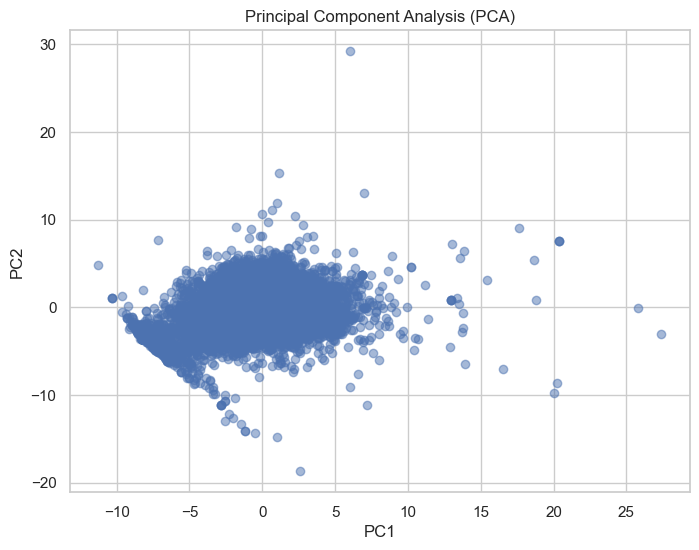

In [87]:
pca_vis = PCA(n_components=2, random_state=42)
X_pca_vis = pca_vis.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca_vis[:, 0], X_pca_vis[:, 1], alpha=0.5)
plt.title("Principal Component Analysis (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

#### Model

In [88]:
def run_kmeans(n_clusters, data_for_cluster):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(data_for_cluster)
    return labels, kmeans.inertia_

In [89]:
range_n_clusters = list(range(2, 26))
inertias = []
silhouette_scores = []

for n_clusters in range_n_clusters:
    labels, inertia = run_kmeans(n_clusters, X_pca)
    inertias.append(inertia)
    s_score = silhouette_score(X_pca, labels)
    silhouette_scores.append(s_score)
    print(f"n_clusters: {n_clusters}, inertia: {inertia:.2f}, silhouette: {s_score:.3f}")

n_clusters: 2, inertia: 444203.95, silhouette: 0.210
n_clusters: 3, inertia: 382478.36, silhouette: 0.222
n_clusters: 4, inertia: 341061.35, silhouette: 0.207
n_clusters: 5, inertia: 314698.13, silhouette: 0.188
n_clusters: 6, inertia: 294107.10, silhouette: 0.192
n_clusters: 7, inertia: 278600.88, silhouette: 0.174
n_clusters: 8, inertia: 267484.10, silhouette: 0.157
n_clusters: 9, inertia: 260891.75, silhouette: 0.159
n_clusters: 10, inertia: 250454.48, silhouette: 0.156
n_clusters: 11, inertia: 243041.40, silhouette: 0.147
n_clusters: 12, inertia: 236629.67, silhouette: 0.137
n_clusters: 13, inertia: 230779.85, silhouette: 0.134
n_clusters: 14, inertia: 225731.85, silhouette: 0.139
n_clusters: 15, inertia: 219732.63, silhouette: 0.139
n_clusters: 16, inertia: 215994.18, silhouette: 0.139
n_clusters: 17, inertia: 211070.13, silhouette: 0.141
n_clusters: 18, inertia: 206538.80, silhouette: 0.138
n_clusters: 19, inertia: 202668.83, silhouette: 0.139
n_clusters: 20, inertia: 199591.56, 

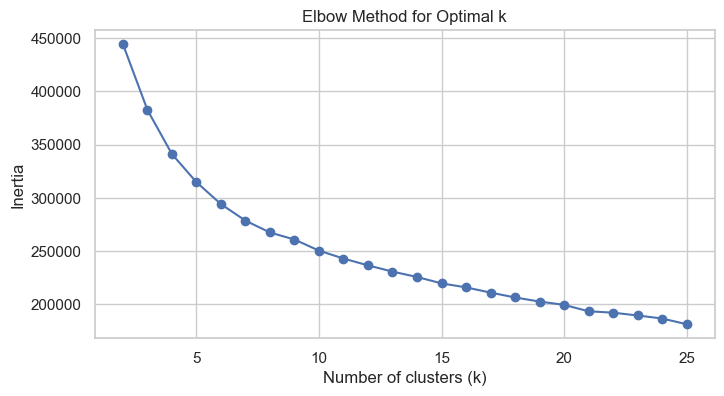

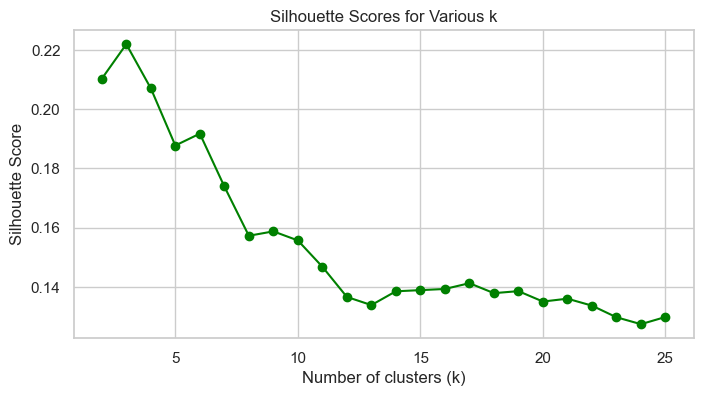

In [90]:
plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, inertias, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='green')
plt.title("Silhouette Scores for Various k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

In [91]:
optimal_k = 25
final_kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
final_labels = final_kmeans.fit_predict(X_pca)

In [92]:
data['cluster_label'] = final_labels

print("Cluster Label Counts:")
print(data['cluster_label'].value_counts())

Cluster Label Counts:
cluster_label
8     2847
9     2736
14    2624
1     2345
6     2133
22    2130
0     2072
18    1958
10    1817
13    1734
15    1632
16    1511
3     1489
4     1255
2     1149
19     906
11     838
5      629
12     226
17     143
20      95
24      58
21      41
7       16
23       2
Name: count, dtype: int64


#### Performance Visualization

In [93]:
cluster_to_archetype = {
    0:  "PG-Scoring Machine: Sharpshooting (primary), Defending (secondary)",
    1:  "PG-Offensive Threat 1: Sharpshooting, Slashing",
    2:  "PG-Offensive Threat 2: Slashing Shot, Creating",
    3:  "PG-Offensive Threat 3: Sharpshooting, Playmaking",
    4:  "PG-Playmaking Shot Creator: Playmaking, Shot Creating",
    5:  "SG-Scoring Machine: Sharpshooting (primary), Sharpshooting (secondary)",
    6:  "SG-2-Way Sharpshooter: Defending, Slashing",
    7:  "SG-Inside Out Playmaker: Sharpshooting, Playmaking",
    8:  "SG-Playmaking Shot Creator: Playmaking, Shot Creating",
    9:  "SG-Shot Creator: Defending, Shot Creating",
    10: "SF-Offensive Threat: Sharpshooting (primary), Playmaking (secondary)",
    11: "SF-3-Level Scorer: Sharpshooting, Slashing",
    12: "SF-2-Way 3-Point Facilitator 1: Defending, Sharpshooting",
    13: "SF-2-Way 3-Point Facilitator 2: Defending, Slashing",
    14: "SF-2-Way Finisher: Slashing, Rim Protector",
    15: "PF-Post Facilitator: Slashing (primary), Defending (secondary)",
    16: "PF-2-Way 3-Level Scorer: Playmaking, Slashing",
    17: "PF-Stretch Glass Cleaner: Post Scoring, Glass Cleaning",
    18: "PF-Mid-Range Facilitator: Defending, Sharpshooting",
    19: "PF-Glass Cleaning Lockdown: Glass Cleaning, Defending",
    20: "C-Paint Beast 1: Slashing Glass (primary), Cleaning (secondary)",
    21: "C-Paint Beast 2: Rim Protector, Slashing",
    22: "C-2-Way Facilitator: Post Scoring, Rim Protector",
    23: "C-Glass Cleaning Finisher: Slashing, Sharpshooting",
    24: "C-Stretch Glass Cleaner: Sharpshooting, Glass Cleaning"
}

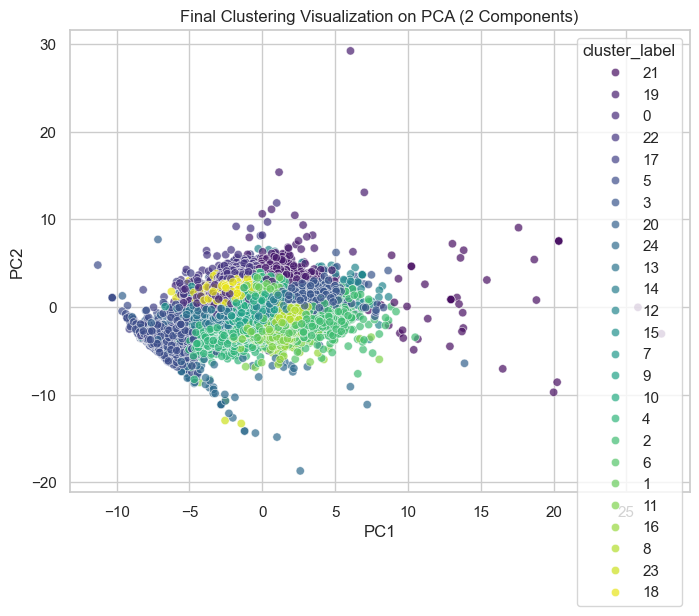

In [94]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_vis[:,0], y=X_pca_vis[:,1],
                hue=data['cluster_label'].astype(str),
                palette='viridis', legend='full', alpha=0.7)
plt.title("Final Clustering Visualization on PCA (2 Components)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [95]:
sil_score = silhouette_score(X_pca, final_labels)
db_score = davies_bouldin_score(X_pca, final_labels)
ch_score = calinski_harabasz_score(X_pca, final_labels)

print("Final Clustering Evaluation Metrics:")
print(f"Silhouette Score: {sil_score:.3f}")
print(f"Davies-Bouldin Score: {db_score:.3f}")
print(f"Calinski-Harabasz Score: {ch_score:.2f}")

Final Clustering Evaluation Metrics:
Silhouette Score: 0.130
Davies-Bouldin Score: 1.400
Calinski-Harabasz Score: 2677.64


In [96]:
cluster_summary = data.groupby('cluster_label')[features + ['ppm', 'fgm_pm', 'ast_tov']].mean().T

print("Cluster Feature Averages:")
display(cluster_summary)

Cluster Feature Averages:


cluster_label,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
ppm,0.279334,0.461343,0.558731,0.639694,0.192128,0.057912,0.306662,0.296231,0.460144,0.296862,...,0.403701,0.404417,0.311690,0.328086,0.646459,0.242919,1.313313,0.421934,0.00,0.165308
fgm_pm,0.100418,0.171447,0.222314,0.250933,0.069308,0.010115,0.122431,0.111464,0.182960,0.115875,...,0.151735,0.153829,0.116295,0.118170,0.230866,0.078049,0.606233,0.148073,0.00,0.032200
x3p_pm,0.039638,0.035335,0.003768,0.004254,0.001232,0.002546,0.000777,0.026508,0.001674,0.001903,...,0.037923,0.000499,0.029161,0.034598,0.070605,0.007646,0.003049,0.075889,0.00,0.000000
x3pa_pm,0.124773,0.102445,0.013954,0.016150,0.011561,0.054554,0.004017,0.113305,0.007236,0.010036,...,0.108815,0.003953,0.103286,0.103063,0.182061,0.084708,0.030488,0.196216,0.00,0.039594
x2p_pm,0.060779,0.136112,0.218546,0.246679,0.068075,0.007569,0.121654,0.084955,0.181286,0.113971,...,0.113811,0.153330,0.087133,0.083572,0.160261,0.070404,0.603184,0.072184,0.00,0.032200
x2pa_pm,0.145386,0.291517,0.405916,0.540240,0.234644,0.176749,0.234305,0.193291,0.370471,0.249588,...,0.218629,0.436736,0.218927,0.191454,0.315736,0.251036,0.849353,0.153176,0.25,0.263211
fg_percent,0.376437,0.437496,0.537630,0.460004,0.291110,0.036153,0.518477,0.363918,0.487107,0.449509,...,0.467843,0.357461,0.361742,0.403158,0.465895,0.186645,0.769467,0.426762,0.00,0.077638
x3p_percent,0.332347,0.355551,0.125768,0.124011,0.018296,0.019819,0.047065,0.211064,0.097039,0.082692,...,0.389475,0.013056,0.194728,0.343496,0.387458,0.060877,0.012195,0.391346,0.00,0.000000
x2p_percent,0.423661,0.469871,0.547203,0.466819,0.299164,0.033210,0.524527,0.448823,0.492323,0.461276,...,0.529443,0.359481,0.386214,0.439624,0.507442,0.193580,0.789386,0.474029,0.00,0.086546
e_fg_percent,0.451930,0.482428,0.541844,0.463921,0.293295,0.040892,0.520034,0.412626,0.489240,0.452999,...,0.525772,0.358002,0.405930,0.462134,0.537457,0.196540,0.771906,0.537216,0.00,0.077638


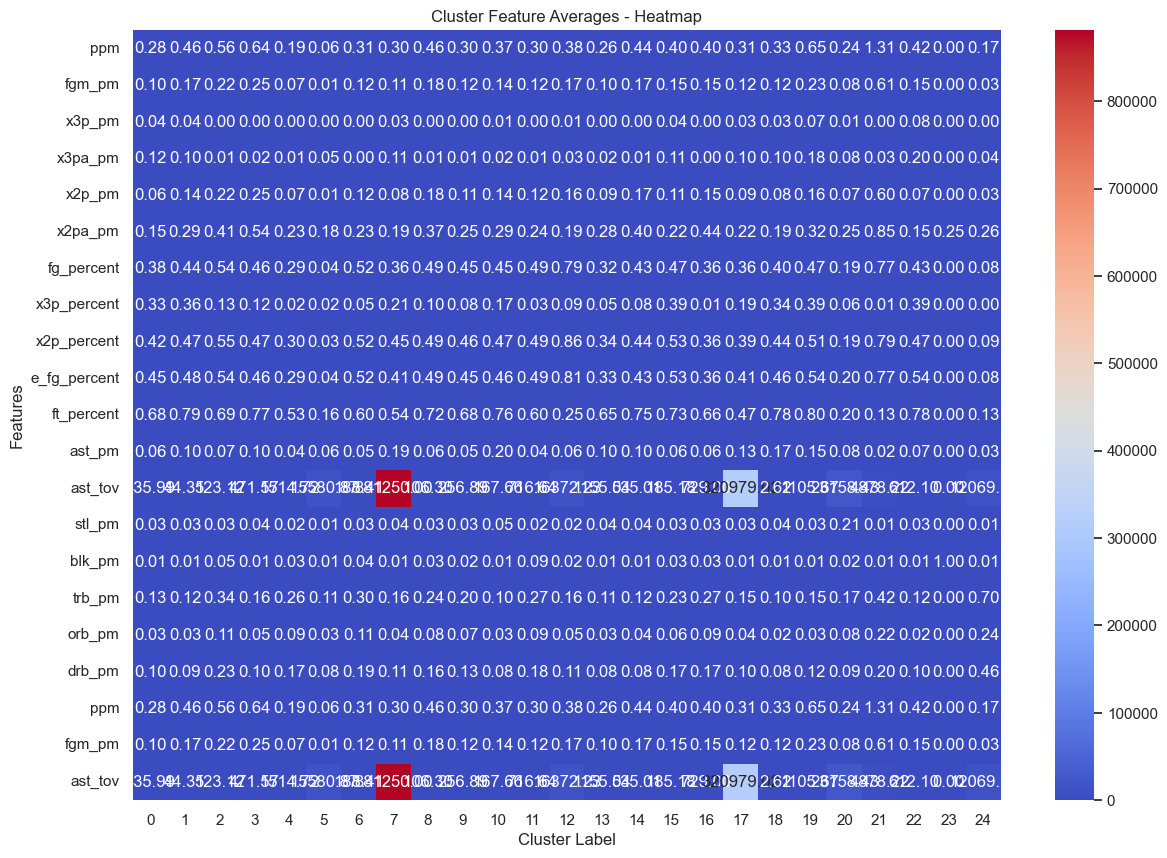

In [97]:
plt.figure(figsize=(14, 10))
sns.heatmap(cluster_summary, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Cluster Feature Averages - Heatmap")
plt.xlabel("Cluster Label")
plt.ylabel("Features")
plt.show()

#### Prediction

In [100]:
X["player"] = y["player"]
X["season"] = y["season"]

In [ ]:
def pred_archetypes(input_metrics):
    input_df = pd.DataFrame([input_metrics], columns=features)
    input_scaled = scaler.transform(input_df)
    input_pca = pca.transform(input_scaled)
    cluster_label = final_kmeans.predict(input_pca)[0]
    archetype = cluster_to_archetype.get(cluster_label, f"Cluster {cluster_label}")
    return archetype

In [107]:
sample_input = {feat: X.loc[(X['player'] == "Shaquille O'Neal") & (X['season'] == 2002), feat].iloc[0] for feat in features}
print(json.dumps(sample_input, indent=4))
predicted_archetype = pred_archetypes(sample_input)
print("Predicted Archetype:", predicted_archetype)

{
    "ppm": 0.7522708505367465,
    "fgm_pm": 0.2939719240297275,
    "x3p_pm": 0.0,
    "x3pa_pm": 0.00041288191577208916,
    "x2p_pm": 0.2939719240297275,
    "x2pa_pm": 0.5070189925681255,
    "fg_percent": 0.5793327908868999,
    "x3p_percent": 0.0,
    "x2p_percent": 0.5798045602605864,
    "e_fg_percent": 0.5793327908868999,
    "ft_percent": 0.5550906555090656,
    "ast_pm": 0.08257638315441784,
    "ast_tov": 1.1695905748777442,
    "stl_pm": 0.016928158546655657,
    "blk_pm": 0.056564822460776217,
    "trb_pm": 0.29521056977704374,
    "orb_pm": 0.09702725020644096,
    "drb_pm": 0.1981833195706028
}
Predicted Archetype: PG-Offensive Threat 2: Slashing Shot, Creating
